## **CAUSAS DE DEFUNCIÓN POR PROVINCIA Y ESPECIALIDADES POR PROVINCIA**

---



![data](https://media1.tenor.com/m/eomT2hRxUYIAAAAC/pooh-think.gif)

# **RESUMEN**

Según estadísticas oficiales del sistema de salud argentino, hay una fuerte carga de enfermedades crónicas no transmisibles, disparidades geográficas en la infraestructura y falta de cobertura médica. Existen distintas fuentes de información disponibles que abordan la situación de la salud argentina, pero lo hacen desde distintos enfoques.

En este proyecto aplicaremos herramientas de ciencias de datos para integrar datos provenientes de distintas fuentes, para analizar y generar conocimiento sobre la situación actual del sistema de salud en Argentina. Nos enfocaremos en determinar el impacto que tienen las disparidades geográficas en infraestructura y en presencia de especializaciones médicas, sobre indicadores del estado de salud de la población. Buscaremos predecir áreas geográficas y/o sectores socioeconómicos de alta vulnerabilidad, para mejorar la gestión de salud en dichas áreas.

Este estudio contribuirá al fortalecimiento del sistema de salud argentino al proporcionar información relevante para la toma de decisiones, la asignación eficiente de recursos y la equidad en la atención médica.

>## **Objetivo:**

**Analizar** y **comprender** la distribución de los establecimientos de salud y las especialidades médicas en todo el país. A partir de este proyecto, se busca generar conocimientos que puedan ser utilizados para mejorar la planificación y la gestión de los recursos de salud a nivel nacional y provincial, así como para identificar posibles áreas de mejora (vulnerabilidad sanitaria).

## *Hipótesis:*
Existe una relación entre las causas más recurrentes de muerte por provincia y la disponibilidad de especialidades médicas en esas regiones. Investigar esta relación proporcionará indicadores clave para la planificación efectiva de recursos de salud, identificando las provincias y las especialidades prioritarias.

Puntos a considerar:

* Causas de Muerte: Analizar las causas de muerte más frecuentes en cada provincia, considerando el total de defunciones en relación con la población total.

* Especialidades Médicas: Evaluar si las especialidades médicas disponibles en cada provincia están alineadas con las causas de muerte predominantes.

* Planificación de Recursos: Utilizar esta información para priorizar la asignación de recursos de salud y la capacitación de personal médico en las áreas críticas identificadas.

* Incluir el análisis del total de defunciones respecto a la población total es crucial, ya que proporciona una perspectiva más precisa de la carga de enfermedades y necesidades de salud en cada provincia.

![data](https://media4.giphy.com/media/v1.Y2lkPTc5MGI3NjExZnJxMXdoNzJmYnI1cmhhOWEzZTRsNWFncXQzejRsYTlvbjVzcnhkMiZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/lJNoBCvQYp7nq/giphy.webp)

# **Importar librerias**

In [ ]:
import pandas as pd
import urllib.request
import numpy as np
import requests, zipfile, io
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from io import StringIO
import os
import geopandas as gpd
import warnings
warnings.filterwarnings('ignore')

# **Datos**

![data](https://media1.giphy.com/media/v1.Y2lkPTc5MGI3NjExdXo4bmZhNGF6dzM3bndrbXh2NDJwNG5uMnJ5eXczNWxwcWU1MHl4YSZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/4FQMuOKR6zQRO/200.webp)

## Dataframe de causas de defunción para analizar

Vamos a trabajar con los datos de:

https://datos.gob.ar/dataset/salud-defunciones-ocurridas-registradas-republica-argentina

Defunciones ocurridas y registradas en la República Argentina entre los años 2005-2022
Cantidad de defunciones ocurridas y registradas en la República Argentina entre los años 2005-2022

In [ ]:
# URL del archivo CSV
url_csv = 'http://datos.salud.gob.ar/dataset/27c588e8-43d0-411a-a40c-7ecc563c2c9f/resource/ccf688f4-db38-4b0f-86f3-c99341ac52ad/download/defunciones-ocurridas-y-registradas-en-la-republica-argentina-entre-los-anos-2005-2022.csv'

# Descargar el archivo CSV
response = requests.get(url_csv)
with open("defunciones.csv", "wb") as f:
    f.write(response.content)

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv('defunciones.csv')

# Hacer una copia del DataFrame
df2 = df.copy()

<ipython-input-333-5ec492679ecc>:10: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('defunciones.csv')


## Dataframe población por provincia

Datos de población por provincia estimados po INDEC a partir de los censos anteriores:

https://sitioanterior.indec.gob.ar/nivel4_default.asp?id_tema_1=2&id_tema_2=24&id_tema_3=85

Datos:
Población estimada al 1 de julio según año calendario por sexo para el total del país y provincias. Años 2010-2040.

La presente publicación describe el proceso a través del cual se elaboraron las proyecciones
de población de las provincias que componen la República Argentina, así como también se presentan los principales resultados.


Proyecciones provinciales de población
por sexo y grupo de edad 2010-2040
Nos quedamos con los datos del 2019

buenos aires 2019 17.370.144

caba 2019 3.072.029

catamarca 2019 411.824

chaco 2019 1.192.616

chubut 2019 608.729

cordoba 2019 3.722.332

corrientes 2019 1.111.052

entre rios 2019 1.373.270

formosa 2019 600.229

jujuy 2019 762.440

la pampa 2019 355.422

la rioja 2019 388.386

mendoza 2019 1.969.982

misiones 2019 1.247.362

neuquen 2019 655.501

rio negro 2019 738.060

salta 2019 1.406.584

san juan 2019 772.876

san luis 2019 502.000

santa cruz 2019 356.647

santa fe 2019 3.509.113

santiago del estero 2019 968.309

tierra del fuego 2019 169.183

tucuman 2019 1.674.622


In [ ]:
# Crear listas con los datos de las provincias y la cantidad de habitantes en 2020
provincias = [
    'Buenos Aires', 'CABA', 'Catamarca', 'Chaco', 'Chubut', 'Córdoba', 'Corrientes',
    'Entre Ríos', 'Formosa', 'Jujuy', 'La Pampa', 'La Rioja', 'Mendoza', 'Misiones',
    'Neuquén', 'Río Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz', 'Santa Fe',
    'Santiago del Estero', 'Tierra del Fuego', 'Tucumán'
]


habitantes_2019 = [
    17370144, 3072029, 411824, 1192616, 608729, 3722332, 1111052, 1373270,
    600229, 762440, 355422, 388386, 1969982, 1247362, 655501, 738060,
    1406584, 772876, 502000, 356647, 3509113, 968309, 169183, 1674622
]


# Crear un diccionario con los datos
data = {
    'Provincia': provincias,
    'Población 2019': habitantes_2019
}

# Crear el DataFrame
df_poblacion = pd.DataFrame(data)

# Mostrar el DataFrame resultante
print("DataFrame df_poblacion:")
print(df_poblacion)


DataFrame df_poblacion:
              Provincia  Población 2019
0          Buenos Aires        17370144
1                  CABA         3072029
2             Catamarca          411824
3                 Chaco         1192616
4                Chubut          608729
5               Córdoba         3722332
6            Corrientes         1111052
7            Entre Ríos         1373270
8               Formosa          600229
9                 Jujuy          762440
10             La Pampa          355422
11             La Rioja          388386
12              Mendoza         1969982
13             Misiones         1247362
14              Neuquén          655501
15            Río Negro          738060
16                Salta         1406584
17             San Juan          772876
18             San Luis          502000
19           Santa Cruz          356647
20             Santa Fe         3509113
21  Santiago del Estero          968309
22     Tierra del Fuego          169183
23              

In [ ]:
# Cambiar nombres de provincias a mayúsculas
df_poblacion['Provincia'] = df_poblacion['Provincia'].str.upper()

In [ ]:
# Cambiar 'TIERRA DEL FUEGO' a 'TIERRA DEL FUEGO, ANTÁRTIDA E ISLAS DEL ATLÁNTICO SUR'
df_poblacion.loc[df_poblacion['Provincia'] == 'TIERRA DEL FUEGO', 'Provincia'] = 'TIERRA DEL FUEGO, ANTÁRTIDA E ISLAS DEL ATLÁNTICO SUR'

In [ ]:
# Ordenar de forma descendente por Población 2020
df_poblacion = df_poblacion.sort_values(by='Población 2019', ascending=False)

# Mostrar el DataFrame ordenado
print(df_poblacion)

                                            Provincia  Población 2019
0                                        BUENOS AIRES        17370144
5                                             CÓRDOBA         3722332
20                                           SANTA FE         3509113
1                                                CABA         3072029
12                                            MENDOZA         1969982
23                                            TUCUMÁN         1674622
16                                              SALTA         1406584
7                                          ENTRE RÍOS         1373270
13                                           MISIONES         1247362
3                                               CHACO         1192616
6                                          CORRIENTES         1111052
21                                SANTIAGO DEL ESTERO          968309
17                                           SAN JUAN          772876
9                   

## Dataframe de especialidades por provincia

Vamos a crear el df de especialidades para luego unir los dataframes.

In [ ]:

# URLs de los archivos CSV en el repositorio
csv_urls = [
    'https://raw.githubusercontent.com/JuliMarquez/Sin-bajar-la-Guard.IA/main/datasets/esp_bsas.csv',
    'https://raw.githubusercontent.com/JuliMarquez/Sin-bajar-la-Guard.IA/main/datasets/esp_cba.csv',
    'https://raw.githubusercontent.com/JuliMarquez/Sin-bajar-la-Guard.IA/main/datasets/esp_caba.csv',
    'https://raw.githubusercontent.com/JuliMarquez/Sin-bajar-la-Guard.IA/main/datasets/esp_mendoza.csv',
    'https://raw.githubusercontent.com/JuliMarquez/Sin-bajar-la-Guard.IA/main/datasets/esp_santafe.csv',
    'https://raw.githubusercontent.com/JuliMarquez/Sin-bajar-la-Guard.IA/main/datasets/esp_catamarca.csv',
    'https://raw.githubusercontent.com/JuliMarquez/Sin-bajar-la-Guard.IA/main/datasets/esp_formosa.csv',
    'https://raw.githubusercontent.com/JuliMarquez/Sin-bajar-la-Guard.IA/main/datasets/esp_entrerios.csv',
    'https://raw.githubusercontent.com/JuliMarquez/Sin-bajar-la-Guard.IA/main/datasets/esp_corrientes.csv',
    'https://raw.githubusercontent.com/JuliMarquez/Sin-bajar-la-Guard.IA/main/datasets/esp_jujuy.csv',
    'https://raw.githubusercontent.com/JuliMarquez/Sin-bajar-la-Guard.IA/main/datasets/esp_larioja.csv',
    'https://raw.githubusercontent.com/JuliMarquez/Sin-bajar-la-Guard.IA/main/datasets/esp_neuquen.csv',
    'https://raw.githubusercontent.com/JuliMarquez/Sin-bajar-la-Guard.IA/main/datasets/esp_rionegro.csv',
    'https://raw.githubusercontent.com/JuliMarquez/Sin-bajar-la-Guard.IA/main/datasets/esp_salta.csv',
    'https://raw.githubusercontent.com/JuliMarquez/Sin-bajar-la-Guard.IA/main/datasets/esp_sanluis.csv',
    'https://raw.githubusercontent.com/JuliMarquez/Sin-bajar-la-Guard.IA/main/datasets/esp_tierradelfuego.csv',
    'https://raw.githubusercontent.com/JuliMarquez/Sin-bajar-la-Guard.IA/main/datasets/esp_tucuman.csv',
    'https://raw.githubusercontent.com/JuliMarquez/Sin-bajar-la-Guard.IA/main/datasets/esp_chaco.csv',
    'https://raw.githubusercontent.com/JuliMarquez/Sin-bajar-la-Guard.IA/main/datasets/esp_lapampa.csv',
    'https://raw.githubusercontent.com/JuliMarquez/Sin-bajar-la-Guard.IA/main/datasets/esp_santacruz.csv',
    'https://raw.githubusercontent.com/JuliMarquez/Sin-bajar-la-Guard.IA/main/datasets/esp_chubut.csv',
    'https://raw.githubusercontent.com/JuliMarquez/Sin-bajar-la-Guard.IA/main/datasets/esp_sanjuan.csv',
    'https://raw.githubusercontent.com/JuliMarquez/Sin-bajar-la-Guard.IA/main/datasets/esp_misiones.csv',
    'https://raw.githubusercontent.com/JuliMarquez/Sin-bajar-la-Guard.IA/main/datasets/esp_santiagodelestero.csv'
]

# Cargar cada archivo CSV en un DataFrame y asignar nombres
dfs = []
names = []
for url in csv_urls:
    temp_df, name = cargar_csv_desde_url(url)
    if temp_df is not None:
        dfs.append(temp_df)
        names.append(name)

# Mostrar información de cada DataFrame cargado
for name, temp_df in zip(names, dfs):
    print(f'Información del DataFrame "{name}":')
    print(temp_df.info())  # Mostrar información del DataFrame
    print()  # Agregar línea en blanco entre DataFrames

Información del DataFrame "esp_bsas.csv":
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Especialidad        80 non-null     object 
 1   Suma de Cantidad    80 non-null     int64  
 2   Suma de Porcentaje  80 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.0+ KB
None

Información del DataFrame "esp_cba.csv":
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Especialidad        71 non-null     object 
 1   Suma de Cantidad    71 non-null     int64  
 2   Suma de Porcentaje  71 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.8+ KB
None

Información del DataFrame "esp_caba.csv":
<class 'pandas.core.frame.DataFrame'>
RangeIn

In [ ]:
# Crear el DataFrame final df_especialidad combinando todos los DataFrames
df_especialidad = None

for df_name, temp_df in zip(names, dfs):
    # Renombrar la columna 'Suma de Cantidad' a nombre de la provincia
    temp_df.rename(columns={'Suma de Cantidad': df_name.replace('.csv', '')}, inplace=True)
    # Seleccionar solo las columnas relevantes para el DataFrame final
    temp_df = temp_df[['Especialidad', df_name.replace('.csv', '')]]
    # Si df_especialidad no ha sido inicializado, inicializarlo con el primer DataFrame
    if df_especialidad is None:
        df_especialidad = temp_df.copy()
    else:
        # Combinar el DataFrame actual con df_especialidad usando la columna 'Especialidad' como índice
        df_especialidad = pd.merge(df_especialidad, temp_df, on='Especialidad', how='outer')

# Mostrar información del DataFrame final
print('Información del DataFrame final df_especialidad:')
print(df_especialidad.info())

Información del DataFrame final df_especialidad:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Especialidad           104 non-null    object 
 1   esp_bsas               80 non-null     float64
 2   esp_cba                71 non-null     float64
 3   esp_caba               80 non-null     float64
 4   esp_mendoza            72 non-null     float64
 5   esp_santafe            68 non-null     float64
 6   esp_catamarca          43 non-null     float64
 7   esp_formosa            46 non-null     float64
 8   esp_entrerios          67 non-null     float64
 9   esp_corrientes         59 non-null     float64
 10  esp_jujuy              61 non-null     float64
 11  esp_larioja            53 non-null     float64
 12  esp_neuquen            66 non-null     float64
 13  esp_rionegro           65 non-null     float64
 14  esp_salta

In [ ]:
df_especialidad['Especialidad'].unique()

array(['Alergia e Inmunología', 'Alergia e inmunología Pediátrica',
       'Anatomía Patológica', 'Anestesiología',
       'Angiología General y Hemodinamia',
       'Auditoría de Servicios de Salud', 'Cardiología',
       'Cardiología Infantil', 'Cirugía Cardiovascular',
       'Cirugía Cardiovascular Pediátric', 'Cirugía de Cabeza y Cuello',
       'Cirugía de Tórax (Cirugía Torácica)', 'Cirugía General',
       'Cirugía infantil (Cirugía Pediátric',
       'Cirugía Plástica y Reparadora', 'Cirugía Vascular Periférica',
       'Clínica Médica', 'Coloproctología', 'Dermatología',
       'Dermatología Pediátrica', 'Diagnóstico por Imágenes',
       'Emergentología', 'Endocrinología', 'Endocrinología Infantil',
       'Enfermería en Cuidados Paliativos',
       'Enfermería en Salud del Adulto', 'Epidemiología',
       'Especialidad de Endodoncia',
       'Especialidad en Cirugía y Traumatología Bucomaxilofacial',
       'Farmacología Clínica',
       'Fisiatría (Medicina Física y Rehabi

In [ ]:
# Diccionario de corrección de especialidades
corrections = {
    'Alergia e inmunología Pediátrica': 'Alergia e Inmunología Pediátrica',
    'Cirugía infantil (Cirugía Pediátric': 'Cirugía Infantil (Cirugía Pediátrica)',
    'Fisiatría (Medicina Física y': 'Fisiatría (Medicina Física y Rehabilitación)',
    'Hemoterapia e Inmunohematol': 'Hemoterapia e Inmunohematología',
    'MASTOLOGÍA (R)': 'Mastología',
    'Medicina General y/o Medicina': 'Medicina General y/o Medicina de Familia',
    'Ortopedia y Traumatología Infantil': 'Ortopedia y Traumatología Infantil',
    'Radiología (R)': 'Radioterapia o Terapia Radiante',
    'Angiología General y Hemodina': 'Angiología General y Hemodinamia',
    'Cirugía de Tórax (Cirugía Torá': 'Cirugía de Tórax (Cirugía Torácica)',
    'Enfermería en Cuidados Paliativ': 'Enfermería en Cuidados Paliativos',
    'Medicina General y/o Medicina': 'Medicina General y/o Medicina de Familia',
    'Auditoría de Servicios de Sal': 'Auditoría de Servicios de Salud',
    'Enfermería en Salud Mental Psiquiatría': 'Enfermería en Salud Mental y Psiquiatría',
    'Fisiatría (Medicina Física y Familia': 'Fisiatría (Medicina Física y Rehabilitación)',
}

# Aplicar la corrección al DataFrame df_especialidad
df_especialidad['Especialidad'] = df_especialidad['Especialidad'].replace(corrections)

# Verificar los cambios
print("Especialidades corregidas:")
print(df_especialidad['Especialidad'].unique())


Especialidades corregidas:
['Alergia e Inmunología' 'Alergia e Inmunología Pediátrica'
 'Anatomía Patológica' 'Anestesiología' 'Angiología General y Hemodinamia'
 'Auditoría de Servicios de Salud' 'Cardiología' 'Cardiología Infantil'
 'Cirugía Cardiovascular' 'Cirugía Cardiovascular Pediátric'
 'Cirugía de Cabeza y Cuello' 'Cirugía de Tórax (Cirugía Torácica)'
 'Cirugía General' 'Cirugía Infantil (Cirugía Pediátrica)'
 'Cirugía Plástica y Reparadora' 'Cirugía Vascular Periférica'
 'Clínica Médica' 'Coloproctología' 'Dermatología'
 'Dermatología Pediátrica' 'Diagnóstico por Imágenes' 'Emergentología'
 'Endocrinología' 'Endocrinología Infantil'
 'Enfermería en Cuidados Paliativos' 'Enfermería en Salud del Adulto'
 'Epidemiología' 'Especialidad de Endodoncia'
 'Especialidad en Cirugía y Traumatología Bucomaxilofacial'
 'Farmacología Clínica' 'Fisiatría (Medicina Física y Rehabilitación)'
 'Gastroenterología' 'Gastroenterología Infantil' 'Genética Médica'
 'Geriatría' 'Gestión de Servicios

In [ ]:
df_especialidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Especialidad           104 non-null    object 
 1   esp_bsas               80 non-null     float64
 2   esp_cba                71 non-null     float64
 3   esp_caba               80 non-null     float64
 4   esp_mendoza            72 non-null     float64
 5   esp_santafe            68 non-null     float64
 6   esp_catamarca          43 non-null     float64
 7   esp_formosa            46 non-null     float64
 8   esp_entrerios          67 non-null     float64
 9   esp_corrientes         59 non-null     float64
 10  esp_jujuy              61 non-null     float64
 11  esp_larioja            53 non-null     float64
 12  esp_neuquen            66 non-null     float64
 13  esp_rionegro           65 non-null     float64
 14  esp_salta              64 non-null     float64
 15  esp_sa

In [ ]:
df_1=df_especialidad.copy()

![data](https://media1.tenor.com/m/2unHkuoMLhcAAAAd/data-code.gif)

# **Preprocesamiento de datos**

![data](https://media2.giphy.com/media/v1.Y2lkPTc5MGI3NjExcnNpbHdsZWVyMXhzZmEzMWRhbTRlejBmdXVub3Znenlwd3VkOXcweCZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/xnzb8OaJeJaakPZrUX/giphy.webp)

Vamos a empezar..

![data](https://media1.tenor.com/m/Q-wCKxouo2QAAAAC/curious-cat.gif)

## Relevamiento del dataframe de causas de defunción

In [ ]:
#información del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825814 entries, 0 to 825813
Data columns (total 11 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   anio                           825814 non-null  int64 
 1   jurisdiccion_de_residencia_id  825814 non-null  int64 
 2   jurisdicion_residencia_nombre  820818 non-null  object
 3   cie10_causa_id                 825814 non-null  object
 4   cie10_clasificacion            824103 non-null  object
 5   sexo_id                        825814 non-null  int64 
 6   Sexo                           825814 non-null  object
 7   muerte_materna_id              46958 non-null   object
 8   muerte_materna_clasificacion   4263 non-null    object
 9   grupo_edad                     825814 non-null  object
 10  cantidad                       825814 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 69.3+ MB


* **anio:**
 * Descripción: Año en el que ocurrieron y se registraron las defunciones.
 * Tipo de Dato: Entero (int64).

* **jurisdiccion_de_residencia_id:**
 * Descripción: ID numérico que representa la jurisdicción de residencia del fallecido.
 * Tipo de Dato: Entero (int64).

* **jurisdicion_residencia_nombre:**
 * Descripción: Nombre de la jurisdicción de residencia del fallecido.
 * Tipo de Dato: Cadena de texto (object).

* **cie10_causa_id:**
 * Descripción: Código de causa de muerte según la Clasificación Internacional de Enfermedades (CIE-10).
 * Tipo de Dato: Cadena de texto (object).

* **cie10_clasificacion:**
 * Descripción: Clasificación de la causa de muerte según la CIE-10.
 * Tipo de Dato: Cadena de texto (object).

* **sexo_id:**
 * Descripción: ID numérico que representa el sexo del fallecido.
 * Tipo de Dato: Entero (int64).

* **Sexo:**
 * Descripción: Sexo del fallecido (por ejemplo, 'Masculino', 'Femenino').
 * Tipo de Dato: Cadena de texto (object).

* **muerte_materna_id:**
 * Descripción: ID que indica si la muerte fue materna.
 * Tipo de Dato: Cadena de texto (object). Tiene muchos valores nulos.

* **muerte_materna_clasificacion:**
 * Descripción: Clasificación de la muerte materna.
 * Tipo de Dato: Cadena de texto (object). Tiene muchos valores nulos.

* **grupo_edad:**
 * Descripción: Grupo de edad del fallecido (por ejemplo, '0-4', '5-9', etc.).
 * Tipo de Dato: Cadena de texto (object).

* **cantidad:**
 * Descripción: Número de defunciones registradas.
 * Tipo de Dato: Entero (int64).

In [ ]:
df.head()

,anio,jurisdiccion_de_residencia_id,jurisdicion_residencia_nombre,cie10_causa_id,cie10_clasificacion,sexo_id,Sexo,muerte_materna_id,muerte_materna_clasificacion,grupo_edad,cantidad
0,2010,62,Río Negro,P52,Hemorragia intracraneal no traumática del feto...,2,femenino,NaN,NaN,01.De a 0 a 14 anios,1
1,2013,90,Tucumán,R95,Síndrome de la muerte súbita infantil,1,masculino,NaN,NaN,01.De a 0 a 14 anios,5
2,2018,34,Formosa,Q91,Síndrome de Edwards y síndrome de Patau,2,femenino,NaN,NaN,01.De a 0 a 14 anios,1
3,2020,6,Buenos Aires,Q79,Malformaciones congénitas del sistema osteomus...,2,femenino,NaN,NaN,01.De a 0 a 14 anios,3
4,2012,2,Ciudad Autónoma de Buenos Aires,B34,Infección viral de sitio no especificado,1,masculino,NaN,NaN,01.De a 0 a 14 anios,1


In [ ]:
df['grupo_edad'].unique()

array(['01.De a 0  a 14 anios', '02.De 15 a 34 anios',
       '03.De 35 a 54 anios', '04.De 55 a 74 anios',
       '05.De 75 anios y mas', '06.Sin especificar'], dtype=object)

In [ ]:
# Separar la columna 'grupo_edad' en 'codigo' y 'rango_edad'
df[['codigo', 'rango_edad']] = df['grupo_edad'].str.split('.', expand=True, n=1)

In [ ]:
# Quiero conocer las jurisdicciones de residencia
df.jurisdicion_residencia_nombre.unique()

array(['Río Negro', 'Tucumán', 'Formosa', 'Buenos Aires',
       'Ciudad Autónoma de Buenos Aires', 'Sin Información', 'Santa Fe',
       'Misiones', 'San Juan', 'Entre Ríos', 'Corrientes', 'Chubut',
       'La Pampa', 'Neuquén', 'Catamarca',
       'Tierra del Fuego, Antártida e Islas del Atlántico Sur',
       'Santa Cruz', 'Mendoza', 'Córdoba', 'Jujuy', 'Chaco',
       'Santiago del Estero', 'Salta', 'La Rioja', 'San Luis', nan],
      dtype=object)

In [ ]:
print(df.isnull().sum())

anio                                  0
jurisdiccion_de_residencia_id         0
jurisdicion_residencia_nombre      4996
cie10_causa_id                        0
cie10_clasificacion                1711
sexo_id                               0
Sexo                                  0
muerte_materna_id                778856
muerte_materna_clasificacion     821551
grupo_edad                            0
cantidad                              0
codigo                                0
rango_edad                            0
dtype: int64


Identificamos que los atributos muerte_materna_id y muerte_materna_clasificacion contienen una gran cantidad de datos faltantes. Debido a su alta proporción de valores ausentes, decidimos eliminarlos del análisis para mantener la integridad y consistencia de los datos.

<ipython-input-350-496a637b21c4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['muerte_materna_id'] = df_clean['muerte_materna_id'].fillna('Desconocido')
<ipython-input-350-496a637b21c4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['muerte_materna_clasificacion'] = df_clean['muerte_materna_clasificacion'].fillna('Desconocido')


<class 'pandas.core.frame.DataFrame'>
Index: 697575 entries, 0 to 825813
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   anio                           697575 non-null  int64 
 1   jurisdiccion_de_residencia_id  697575 non-null  int64 
 2   jurisdicion_residencia_nombre  697575 non-null  object
 3   cie10_causa_id                 697575 non-null  object
 4   cie10_clasificacion            697575 non-null  object
 5   sexo_id                        697575 non-null  int64 
 6   Sexo                           697575 non-null  object
 7   muerte_materna_id              697575 non-null  object
 8   muerte_materna_clasificacion   697575 non-null  object
 9   grupo_edad                     697575 non-null  object
 10  cantidad                       697575 non-null  int64 
 11  codigo                         697575 non-null  object
 12  rango_edad                     697575 non-null  o

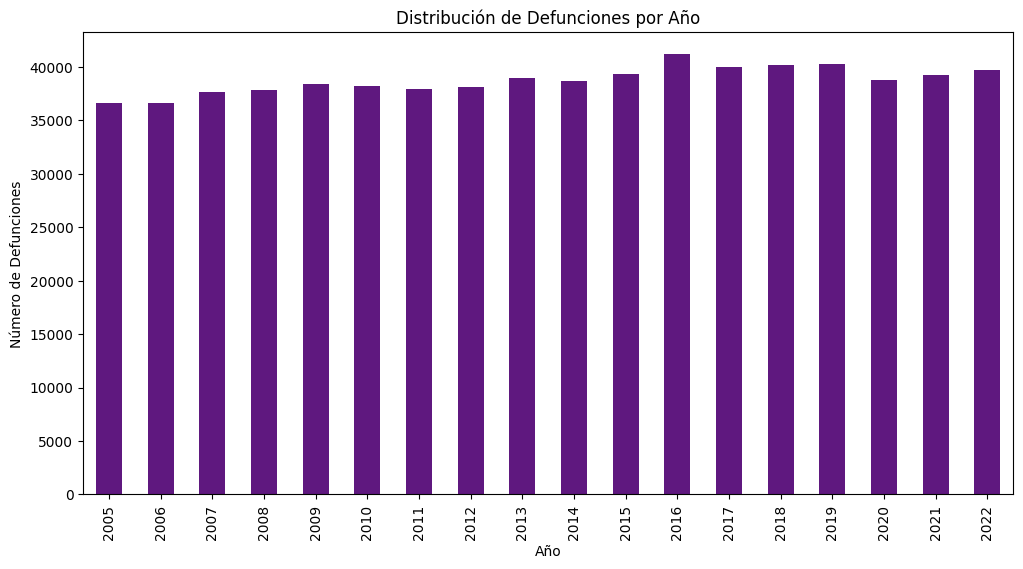

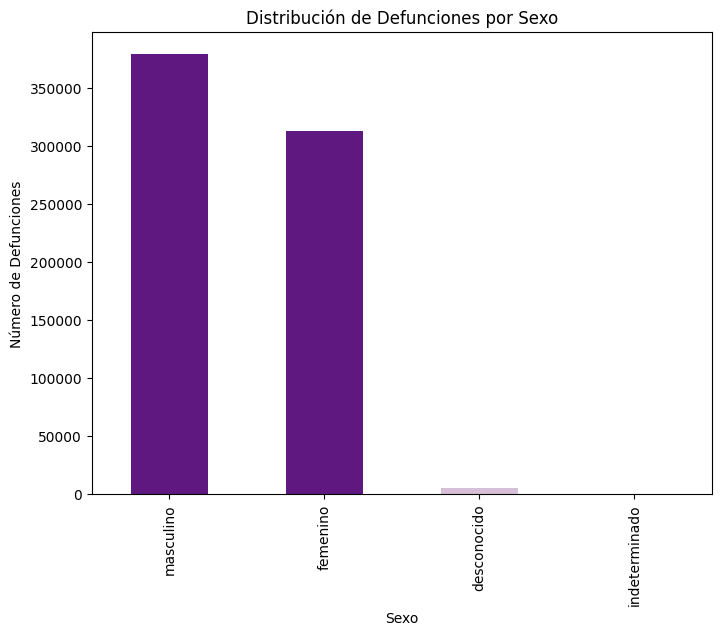

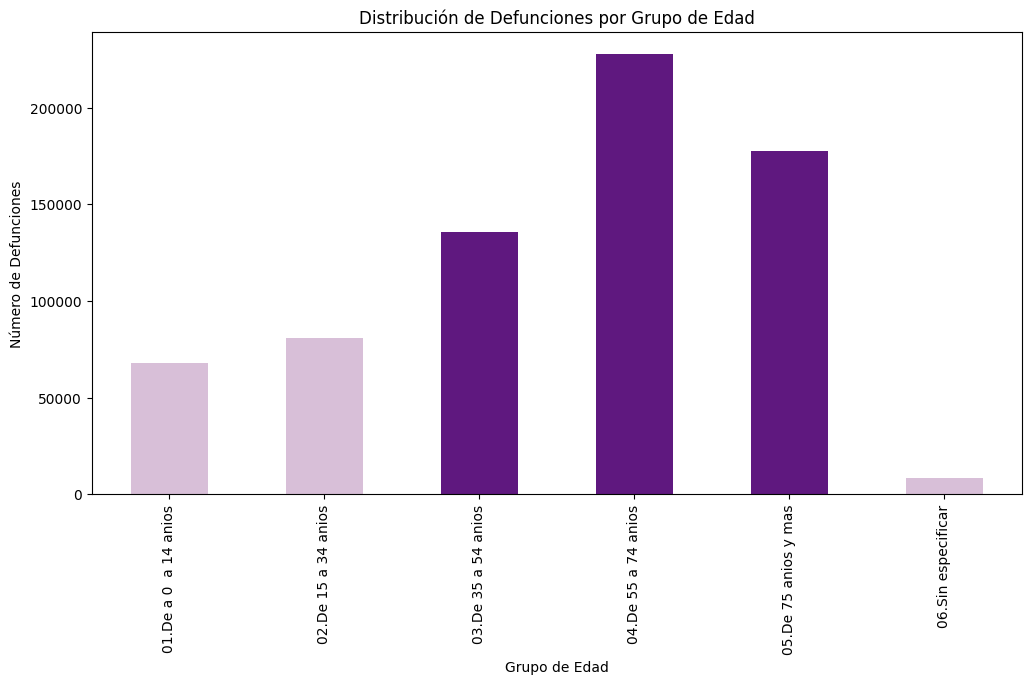

<ipython-input-350-496a637b21c4>:63: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x='cie10_clasificacion', hue='Sexo', data=df_clean, order=top_causas, palette=[lila_claro, lila_oscuro])


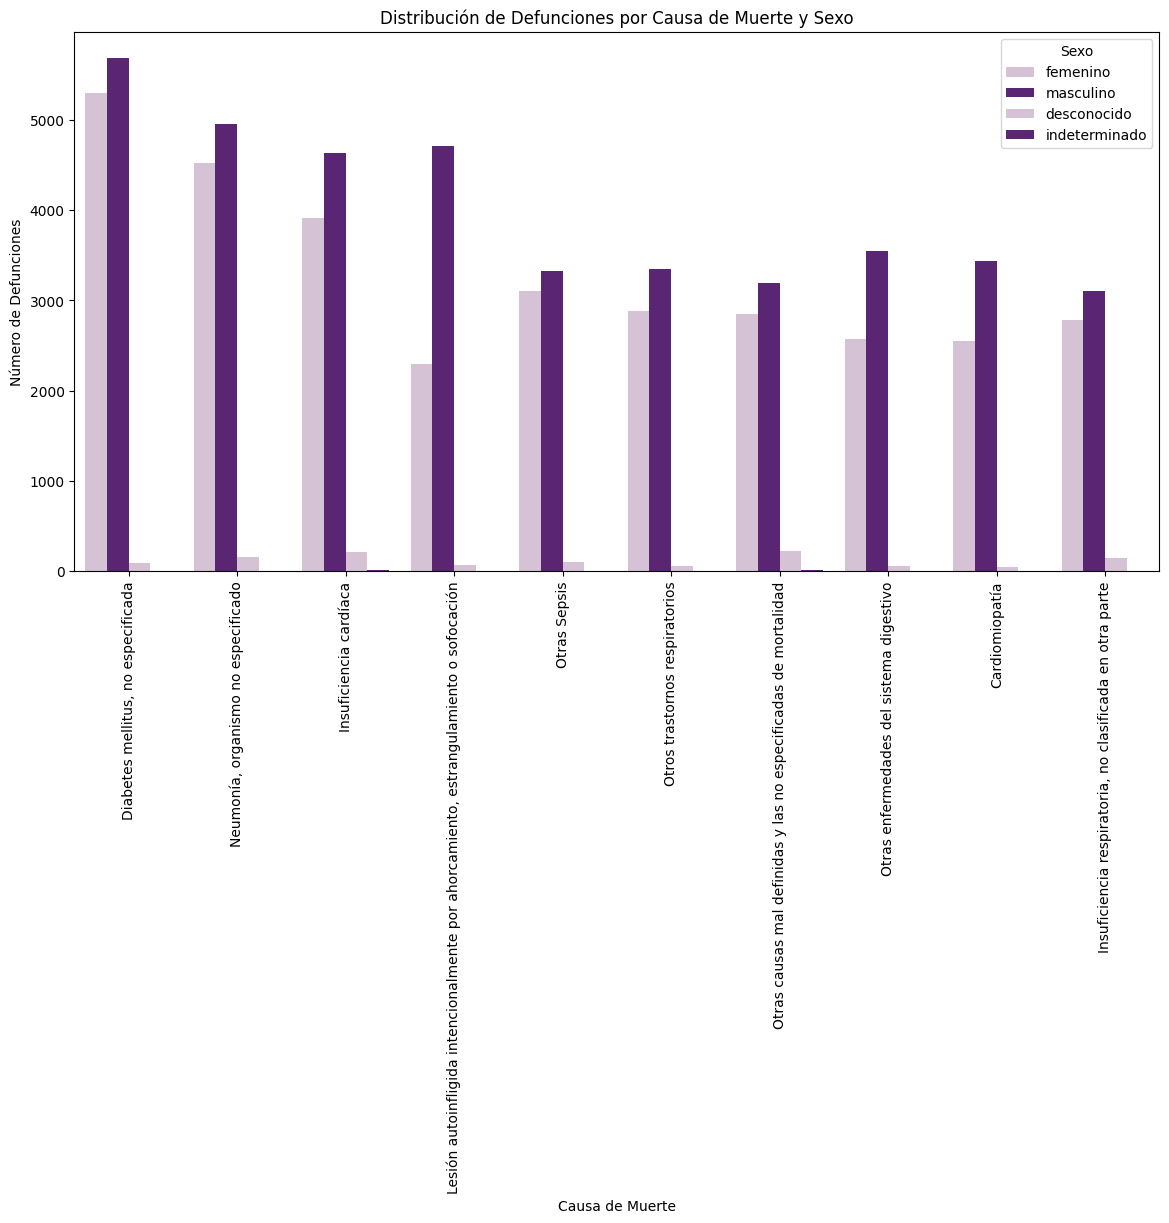

In [ ]:
# Eliminar filas con valores nulos en columnas críticas
df_clean = df.dropna(subset=['jurisdicion_residencia_nombre', 'cie10_clasificacion'])

# Manejar valores nulos en otras columnas
df_clean['muerte_materna_id'] = df_clean['muerte_materna_id'].fillna('Desconocido')
df_clean['muerte_materna_clasificacion'] = df_clean['muerte_materna_clasificacion'].fillna('Desconocido')

# Eliminar duplicados
df_clean = df_clean.drop_duplicates()

# Verificar la información del DataFrame limpio
print(df_clean.info())

# Verificar los valores nulos
print(df_clean.isnull().sum())

# Obtener la paleta 'magma' de seaborn
palette = sns.color_palette('magma', as_cmap=False)

# Seleccionar el color lila de la paleta 'magma'
color_lila = palette[1]


# Definir colores lila oscuro y claro
lila_oscuro = color_lila
lila_claro = '#D8BFD8'

# Función para asignar colores dependiendo del tamaño
def asignar_colores(series):
    max_value = series.max()
    return [lila_oscuro if value > max_value / 2 else lila_claro for value in series]

# Distribución por año
anio_counts = df_clean['anio'].value_counts().sort_index()
anio_colors = asignar_colores(anio_counts)
anio_counts.plot(kind='bar', figsize=(12, 6), color=anio_colors)
plt.xlabel('Año')
plt.ylabel('Número de Defunciones')
plt.title('Distribución de Defunciones por Año')
plt.show()

# Distribución por sexo
sexo_counts = df_clean['Sexo'].value_counts()
sexo_colors = asignar_colores(sexo_counts)
sexo_counts.plot(kind='bar', figsize=(8, 6), color=sexo_colors)
plt.xlabel('Sexo')
plt.ylabel('Número de Defunciones')
plt.title('Distribución de Defunciones por Sexo')
plt.show()

# Distribución por grupo de edad
grupo_edad_counts = df_clean['grupo_edad'].value_counts().sort_index()
grupo_edad_colors = asignar_colores(grupo_edad_counts)
grupo_edad_counts.plot(kind='bar', figsize=(12, 6), color=grupo_edad_colors)
plt.xlabel('Grupo de Edad')
plt.ylabel('Número de Defunciones')
plt.title('Distribución de Defunciones por Grupo de Edad')
plt.show()

# Relación entre causa de muerte y sexo
top_causas = df_clean['cie10_clasificacion'].value_counts().index[:10]
plt.figure(figsize=(14, 7))
sns.countplot(x='cie10_clasificacion', hue='Sexo', data=df_clean, order=top_causas, palette=[lila_claro, lila_oscuro])
plt.xticks(rotation=90)
plt.xlabel('Causa de Muerte')
plt.ylabel('Número de Defunciones')
plt.title('Distribución de Defunciones por Causa de Muerte y Sexo')
plt.legend(title='Sexo')
plt.show()

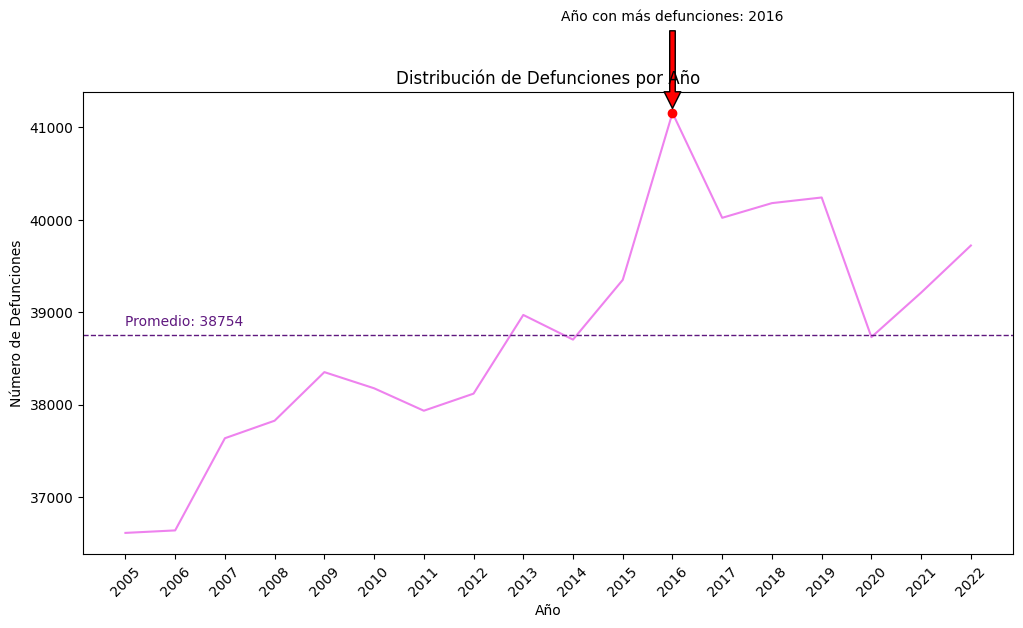

In [ ]:
# Agrupar los datos por año y contar las defunciones
anio_counts = df_clean.groupby('anio').size()

# Identificar el año con la mayor cantidad de defunciones
max_anio = anio_counts.idxmax()
max_valor = anio_counts.max()

# Calcular el promedio de defunciones por año
promedio_defunciones = anio_counts.mean()

# Gráfico de Líneas
fig, ax = plt.subplots(figsize=(12, 6))
anio_counts.plot(kind='line', color='violet', ax=ax)  # Línea del gráfico en color violeta

# Añadir un marcador salmón para el año con mayor cantidad de defunciones
ax.plot(max_anio, max_valor, 'o', color='red')  # Marcador salmón

# Añadir una línea horizontal rosa para el promedio
ax.axhline(promedio_defunciones, color=color_lila, linestyle='--', linewidth=1)  # Línea horizontal rosa

# Añadir una anotación para el promedio
ax.text(anio_counts.index.min(), promedio_defunciones + 100,
        f'Promedio: {promedio_defunciones:.0f}',
        color=color_lila,  # Anotación rosa
        ha='left')

# Configuración de los ejes
ax.set_xlabel('Año')
ax.set_ylabel('Número de Defunciones')
ax.set_title('Distribución de Defunciones por Año')
ax.set_xticks(df_clean['anio'].unique())  # Añadir marcas para cada año
ax.set_xticklabels(df_clean['anio'].unique(), rotation=45)  # Rotar las etiquetas para mejor visibilidad

# Añadir una anotación para el año de mayor defunciones
ax.annotate(f'Año con más defunciones: {max_anio}',
            xy=(max_anio, max_valor),
            xytext=(max_anio, max_valor + 1000),
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='center')

plt.show()


In [ ]:
df_clean['jurisdicion_residencia_nombre'].unique()

array(['Río Negro', 'Tucumán', 'Formosa', 'Buenos Aires',
       'Ciudad Autónoma de Buenos Aires', 'Sin Información', 'Santa Fe',
       'Misiones', 'San Juan', 'Entre Ríos', 'Corrientes', 'Chubut',
       'La Pampa', 'Neuquén', 'Catamarca',
       'Tierra del Fuego, Antártida e Islas del Atlántico Sur',
       'Santa Cruz', 'Mendoza', 'Córdoba', 'Jujuy', 'Chaco',
       'Santiago del Estero', 'Salta', 'La Rioja', 'San Luis'],
      dtype=object)

In [ ]:
df_clean['cie10_clasificacion'].unique()

array(['Hemorragia intracraneal no traumática del feto y del recién nacido',
       'Síndrome de la muerte súbita infantil',
       'Síndrome de Edwards y síndrome  de Patau', ...,
       'Trastornos delirantes persistentes',
       'Hallazgo de drogas y otras sustancias que normalmente no se encuentran en la sangre',
       'Medicamentos o sustancias biológicas contaminados'], dtype=object)

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 697575 entries, 0 to 825813
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   anio                           697575 non-null  int64 
 1   jurisdiccion_de_residencia_id  697575 non-null  int64 
 2   jurisdicion_residencia_nombre  697575 non-null  object
 3   cie10_causa_id                 697575 non-null  object
 4   cie10_clasificacion            697575 non-null  object
 5   sexo_id                        697575 non-null  int64 
 6   Sexo                           697575 non-null  object
 7   muerte_materna_id              697575 non-null  object
 8   muerte_materna_clasificacion   697575 non-null  object
 9   grupo_edad                     697575 non-null  object
 10  cantidad                       697575 non-null  int64 
 11  codigo                         697575 non-null  object
 12  rango_edad                     697575 non-null  o

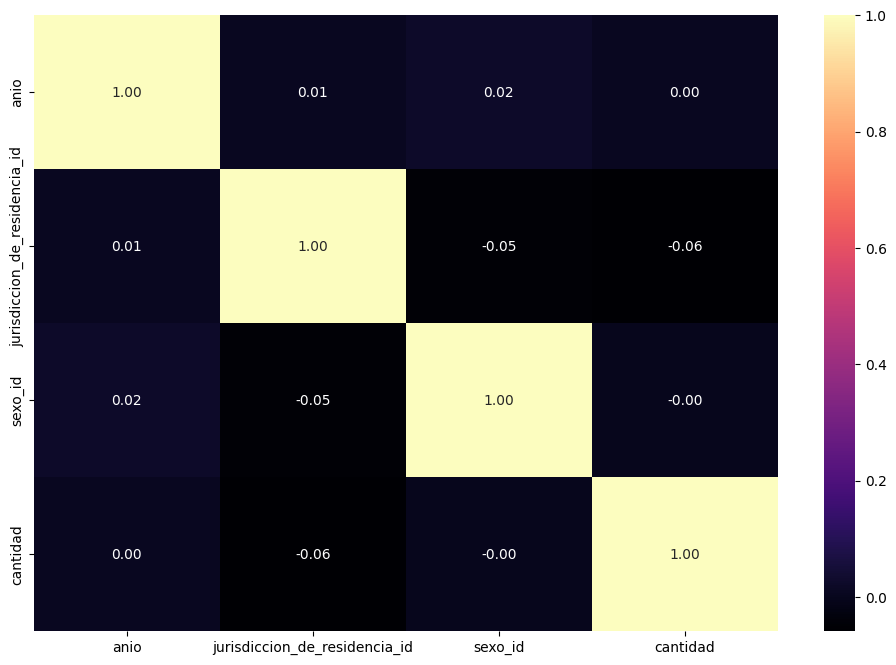

In [ ]:
# Select only numeric columns
numeric_columns = df_clean.select_dtypes(include=['float64', 'int64'])

# Create a correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='magma', fmt=".2f")
plt.show()

In [ ]:
df_clean['anio'].unique()

array([2010, 2013, 2018, 2020, 2012, 2009, 2017, 2019, 2016, 2021, 2011,
       2007, 2006, 2015, 2022, 2014, 2008, 2005])

Vamos a quedarnos con los datos de 2019 y 2020

In [ ]:
filtered_df = df_clean[(df_clean['anio'] >= 2019) & (df_clean['anio'] <= 2019)]


In [ ]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40242 entries, 8 to 825793
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   anio                           40242 non-null  int64 
 1   jurisdiccion_de_residencia_id  40242 non-null  int64 
 2   jurisdicion_residencia_nombre  40242 non-null  object
 3   cie10_causa_id                 40242 non-null  object
 4   cie10_clasificacion            40242 non-null  object
 5   sexo_id                        40242 non-null  int64 
 6   Sexo                           40242 non-null  object
 7   muerte_materna_id              40242 non-null  object
 8   muerte_materna_clasificacion   40242 non-null  object
 9   grupo_edad                     40242 non-null  object
 10  cantidad                       40242 non-null  int64 
 11  codigo                         40242 non-null  object
 12  rango_edad                     40242 non-null  object
dtypes: in

In [ ]:
filtered_df['jurisdicion_residencia_nombre'].unique()

array(['San Juan', 'Buenos Aires', 'Santa Fe', 'Jujuy', 'La Rioja',
       'Córdoba', 'Chaco', 'Misiones', 'Corrientes', 'Santa Cruz',
       'San Luis', 'Neuquén', 'Santiago del Estero', 'Salta', 'Catamarca',
       'La Pampa', 'Mendoza', 'Tucumán', 'Formosa',
       'Ciudad Autónoma de Buenos Aires', 'Entre Ríos', 'Chubut',
       'Río Negro', 'Sin Información',
       'Tierra del Fuego, Antártida e Islas del Atlántico Sur'],
      dtype=object)

In [ ]:
# Se eliminan las filas con el valor "Sin Información" en la columna referida al nombre de la jurisdicción
df2 = filtered_df.loc[filtered_df['jurisdicion_residencia_nombre'] != "Sin Información"]

df2 = df2.drop(columns=['anio'])

In [ ]:
# Verificación que sólo queden las filas con el nombre de las provincias correctamente definido
df2['jurisdicion_residencia_nombre'].unique()

array(['San Juan', 'Buenos Aires', 'Santa Fe', 'Jujuy', 'La Rioja',
       'Córdoba', 'Chaco', 'Misiones', 'Corrientes', 'Santa Cruz',
       'San Luis', 'Neuquén', 'Santiago del Estero', 'Salta', 'Catamarca',
       'La Pampa', 'Mendoza', 'Tucumán', 'Formosa',
       'Ciudad Autónoma de Buenos Aires', 'Entre Ríos', 'Chubut',
       'Río Negro',
       'Tierra del Fuego, Antártida e Islas del Atlántico Sur'],
      dtype=object)

In [ ]:
# Verificación que no queden filas en el dataframe con valor NaN en la columna referida al nombre de la jurisdicción
df2[df2['jurisdicion_residencia_nombre'].isnull()]

,jurisdiccion_de_residencia_id,jurisdicion_residencia_nombre,cie10_causa_id,cie10_clasificacion,sexo_id,Sexo,muerte_materna_id,muerte_materna_clasificacion,grupo_edad,cantidad,codigo,rango_edad


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39692 entries, 8 to 825782
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   jurisdiccion_de_residencia_id  39692 non-null  int64 
 1   jurisdicion_residencia_nombre  39692 non-null  object
 2   cie10_causa_id                 39692 non-null  object
 3   cie10_clasificacion            39692 non-null  object
 4   sexo_id                        39692 non-null  int64 
 5   Sexo                           39692 non-null  object
 6   muerte_materna_id              39692 non-null  object
 7   muerte_materna_clasificacion   39692 non-null  object
 8   grupo_edad                     39692 non-null  object
 9   cantidad                       39692 non-null  int64 
 10  codigo                         39692 non-null  object
 11  rango_edad                     39692 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.9+ MB


<ipython-input-364-7b6f8c3e868b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df2, y='jurisdicion_residencia_nombre', palette='magma', order=df2['jurisdicion_residencia_nombre'].value_counts().index)


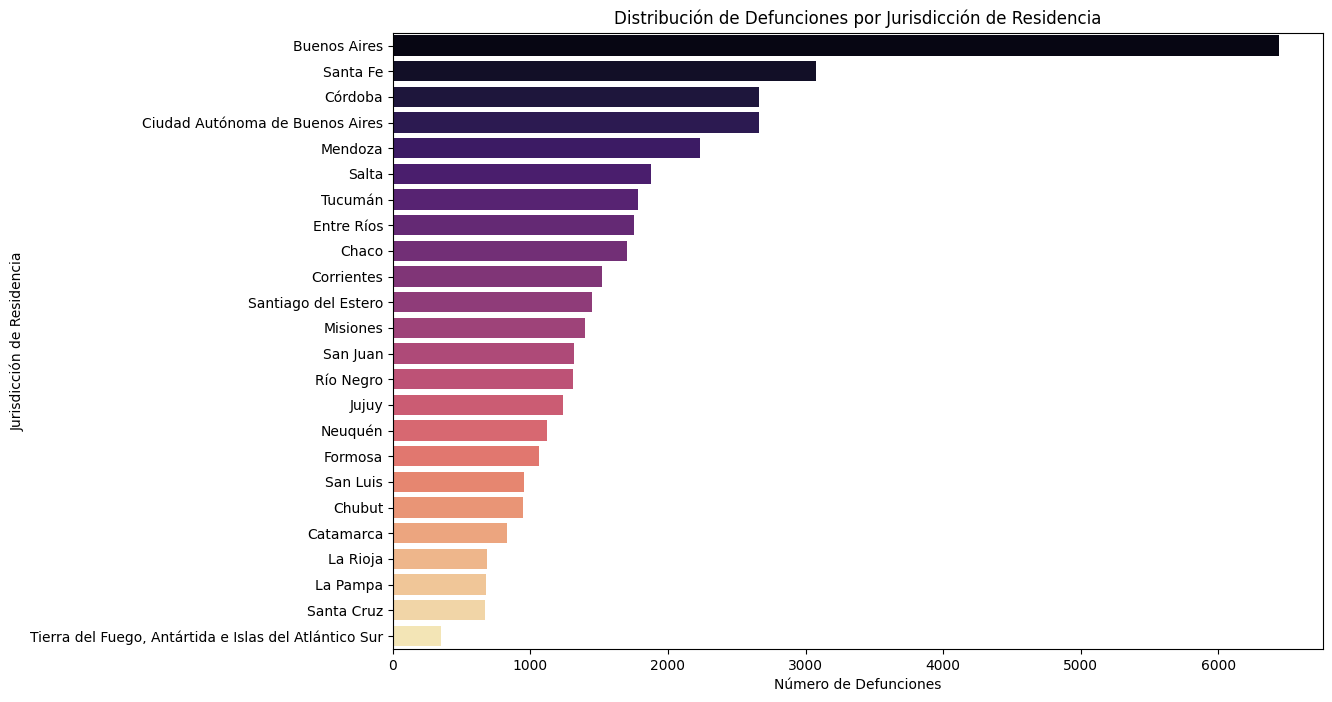

In [ ]:
# Distribución de muertes por jurisdicción
plt.figure(figsize=(12, 8))
sns.countplot(data=df2, y='jurisdicion_residencia_nombre', palette='magma', order=df2['jurisdicion_residencia_nombre'].value_counts().index)
plt.xlabel('Número de Defunciones')
plt.ylabel('Jurisdicción de Residencia')
plt.title('Distribución de Defunciones por Jurisdicción de Residencia')
plt.show()

<ipython-input-365-677ad116289a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_jur_cantidad, y='jurisdicion_residencia_nombre', x='cantidad', palette='magma', order=df_jur_cantidad.sort_values('cantidad', ascending=False)['jurisdicion_residencia_nombre'])


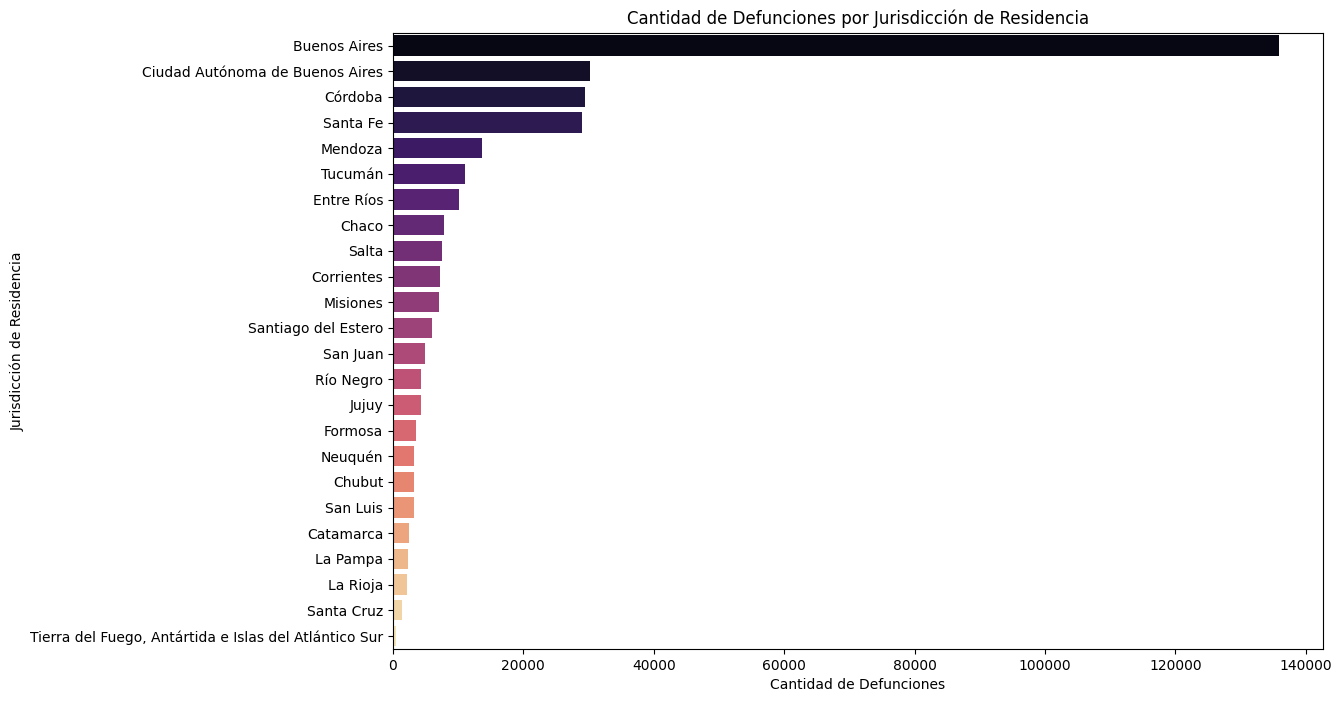

In [ ]:
# Sumar la cantidad de muertes por jurisdicción
df_jur_cantidad = df2.groupby('jurisdicion_residencia_nombre')['cantidad'].sum().reset_index()

# Graficar la cantidad de muertes por jurisdicción
plt.figure(figsize=(12, 8))
sns.barplot(data=df_jur_cantidad, y='jurisdicion_residencia_nombre', x='cantidad', palette='magma', order=df_jur_cantidad.sort_values('cantidad', ascending=False)['jurisdicion_residencia_nombre'])
plt.xlabel('Cantidad de Defunciones')
plt.ylabel('Jurisdicción de Residencia')
plt.title('Cantidad de Defunciones por Jurisdicción de Residencia')
plt.show()


In [ ]:
# Crear la tabla de contingencia
crosstab_jur_causa = pd.crosstab(df2['jurisdicion_residencia_nombre'], df2['cie10_clasificacion'])

## Exploración y mapeo de causas de defunción a especialidades

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39692 entries, 8 to 825782
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   jurisdiccion_de_residencia_id  39692 non-null  int64 
 1   jurisdicion_residencia_nombre  39692 non-null  object
 2   cie10_causa_id                 39692 non-null  object
 3   cie10_clasificacion            39692 non-null  object
 4   sexo_id                        39692 non-null  int64 
 5   Sexo                           39692 non-null  object
 6   muerte_materna_id              39692 non-null  object
 7   muerte_materna_clasificacion   39692 non-null  object
 8   grupo_edad                     39692 non-null  object
 9   cantidad                       39692 non-null  int64 
 10  codigo                         39692 non-null  object
 11  rango_edad                     39692 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.9+ MB


Se plantea que asignar a cada motivo de defunción una especialidad médica y analizar su disponibilidad en la provincia donde ocurrieron las defunciones permitirá investigar si la falta de establecimientos o de inversión en especialistas podría estar relacionada con las causas de muerte registradas.

Este enfoque busca explorar si la accesibilidad a servicios de salud especializados influye significativamente en las tasas de defunciones. Identificar la disponibilidad de especialidades médicas en diferentes áreas podría revelar necesidades específicas de recursos de salud, áreas con limitada oferta de especialistas, y áreas que podrían beneficiarse de mejoras en la planificación y gestión de recursos sanitarios, potencialmente reduciendo las defunciones evitables.

In [ ]:
# Agrupar por jurisdiccion_residencia_nombre (provincia) y cie10_clasificacion (causa de muerte)
df_causas_provincia = df2.groupby(['jurisdicion_residencia_nombre', 'cie10_clasificacion']).agg({'cantidad': 'sum'}).reset_index()

# Renombrar columnas para mayor claridad
df_causas_provincia.columns = ['Provincia', 'Causa_de_muerte', 'Cantidad_de_muertes']

# Ver el resultado
df_causas_provincia.head()


,Provincia,Causa_de_muerte,Cantidad_de_muertes
0,Buenos Aires,"Absceso cutáneo, furúnculo y ántrax",16
1,Buenos Aires,Absceso del pulmón y del mediastino,10
2,Buenos Aires,Absceso y granuloma intracraneal e intrarraquídeo,13
3,Buenos Aires,"Accidente de aeronave sin motor, con ocupante ...",1
4,Buenos Aires,Accidente de transporte no especificado,1


In [ ]:
# Agrupar por cie10_clasificacion (causa de muerte)
df_causas_totales = df2.groupby('cie10_clasificacion').agg({'cantidad': 'sum'}).reset_index()

# Renombrar columnas para mayor claridad
df_causas_totales.columns = ['Causa_de_muerte', 'Cantidad_de_muertes']

# Ver el resultado
df_causas_totales.head()


,Causa_de_muerte,Cantidad_de_muertes
0,Aborto espontáneo,1
1,Aborto médico,1
2,Aborto no especificado,6
3,"Absceso cutáneo, furúnculo y ántrax",42
4,Absceso de las regiones anal y rectal,7


In [ ]:
# Ajustar las opciones de pandas para ver todos los elementos en un array
pd.set_option('display.max_seq_items', None)

# Listar todas las causas de muerte
causas_de_muerte = df2['cie10_clasificacion'].unique()

# Mostrar todas las causas de muerte
print(causas_de_muerte)

['Sepsis bacteriana del recién nacido'
 'Retardo del crecimiento fetal y desnutrición fetal'
 'Otras malformaciones congénitas, no clasificadas en otra parte' ...
 'Agresión con otros productos químicos y sustancias nocivas especificadas'
 'Contacto con aire y gases calientes'
 'Deficiencias de otros elementos nutricionales']


In [ ]:
# Convertir a una lista y ordenar
causas_de_muerte_lista = df2['cie10_clasificacion'].unique()


In [ ]:
print(len(causas_de_muerte_lista))

1077


In [ ]:
# Mostrar cada causa de muerte en una línea separada
for i in range(0,300,1):
    print(causas_de_muerte_lista[i])

Sepsis bacteriana del recién nacido
Retardo del crecimiento fetal y desnutrición fetal
Otras malformaciones congénitas, no clasificadas en otra parte
Hipoxia intrauterina
Malformaciones congénitas del sistema osteomuscular, no clasificadas en otra parte
Agenesia renal y otras malformaciones hipoplásicas del riñón
Síndrome de Edwards y síndrome  de Patau
Púrpura y otras afecciones hemorrágicas
Síndrome de la muerte súbita infantil
Otras afecciones de la piel especificas del feto y del recién nacido
Síndromes de aspiración neonatal
Enfisema intersticial y afecciones relacionadas, originadas en el período perinatal
Malformaciones congénitas de los tabiques cardíacos
Feto y recién nacido afectado por complicaciones de la placenta, del cordón umbilical y de las membranas
Malformaciones congénitas de las grandes venas
Tumor maligno de los huesos y de los cartílagos articulares, de otros sitios y de sitios no especificados
Otras causas mal definidas y las no especificadas de mortalidad
Otras 

En este análisis, nos centraremos únicamente en las 15 causas de muerte más frecuentes por provincia, dado el extenso número de causas de muerte y que el mapeo a especialidades médicas responsables debe realizarse de manera manual. Posteriormente, agregaremos una columna para indicar la especialidad médica correspondiente.

Luego, integraremos esta información con el dataframe de especialidades médicas por provincia. Este proceso permitirá evaluar la concordancia entre las causas de muerte y la disponibilidad de especialistas en cada región, proporcionando insights sobre posibles deficiencias en la distribución de recursos médicos.

In [ ]:
# Renombrar las columnas necesarias
df2.rename(columns={'jurisdicion_residencia_nombre': 'provincia_nombre', 'cie10_clasificacion': 'causa_defuncion'}, inplace=True)

# Agrupar por provincia y causa de muerte, contar la cantidad de registros y ordenar en orden descendente
causas_comunes = df2.groupby(['provincia_nombre', 'causa_defuncion']).size().reset_index(name='cantidad')
causas_comunes = causas_comunes.sort_values(['provincia_nombre', 'cantidad'], ascending=[True, False])

# Quedarse con las 5 causas de muerte más comunes por provincia
top_causas_comunes = causas_comunes.groupby('provincia_nombre').head(15)

# Visualizar la cantidad de datos resultantes
print(top_causas_comunes.groupby('provincia_nombre')['cantidad'].sum())


provincia_nombre
Buenos Aires                                             759
Catamarca                                                181
Chaco                                                    270
Chubut                                                   192
Ciudad Autónoma de Buenos Aires                          380
Corrientes                                               280
Córdoba                                                  403
Entre Ríos                                               272
Formosa                                                  218
Jujuy                                                    226
La Pampa                                                 143
La Rioja                                                 180
Mendoza                                                  317
Misiones                                                 251
Neuquén                                                  209
Río Negro                                                206
Salta  

In [ ]:
# Obtener una lista de las causas de muerte más comunes por provincia
causas_comunes_por_provincia = top_causas_comunes.groupby('provincia_nombre')['causa_defuncion'].apply(list).to_dict()

# Filtrar el DataFrame original para quedarse solo con las filas que contienen las causas de muerte más comunes por provincia
df_filtrado = df2[df2['provincia_nombre'].notnull() & df2.apply(lambda x: x['causa_defuncion'] in causas_comunes_por_provincia.get(x['provincia_nombre'], []), axis=1)]

# Mostrar el DataFrame filtrado
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6404 entries, 376 to 825571
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   jurisdiccion_de_residencia_id  6404 non-null   int64 
 1   provincia_nombre               6404 non-null   object
 2   cie10_causa_id                 6404 non-null   object
 3   causa_defuncion                6404 non-null   object
 4   sexo_id                        6404 non-null   int64 
 5   Sexo                           6404 non-null   object
 6   muerte_materna_id              6404 non-null   object
 7   muerte_materna_clasificacion   6404 non-null   object
 8   grupo_edad                     6404 non-null   object
 9   cantidad                       6404 non-null   int64 
 10  codigo                         6404 non-null   object
 11  rango_edad                     6404 non-null   object
dtypes: int64(3), object(9)
memory usage: 650.4+ KB


In [ ]:
top_causas_comunes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 360 entries, 125 to 9029
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   provincia_nombre  360 non-null    object
 1   causa_defuncion   360 non-null    object
 2   cantidad          360 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 11.2+ KB


In [ ]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6404 entries, 376 to 825571
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   jurisdiccion_de_residencia_id  6404 non-null   int64 
 1   provincia_nombre               6404 non-null   object
 2   cie10_causa_id                 6404 non-null   object
 3   causa_defuncion                6404 non-null   object
 4   sexo_id                        6404 non-null   int64 
 5   Sexo                           6404 non-null   object
 6   muerte_materna_id              6404 non-null   object
 7   muerte_materna_clasificacion   6404 non-null   object
 8   grupo_edad                     6404 non-null   object
 9   cantidad                       6404 non-null   int64 
 10  codigo                         6404 non-null   object
 11  rango_edad                     6404 non-null   object
dtypes: int64(3), object(9)
memory usage: 650.4+ KB


In [ ]:
df_filtrado=df_filtrado.drop(['muerte_materna_id', 'muerte_materna_clasificacion'], axis=1)

In [ ]:
# Contar el número de causas de defunción únicas en todo el DataFrame
num_causas_unicas = top_causas_comunes['causa_defuncion'].nunique()
print(f"El número de causas de defunción únicas en el top_causas_comunes es: {num_causas_unicas}")

El número de causas de defunción únicas en el top_causas_comunes es: 63


In [ ]:
# Obtener las 47 causas de muerte únicas
causas_unicas = top_causas_comunes['causa_defuncion'].unique()

# Imprimir las 40 causas de muerte únicas
for index, causa in enumerate(causas_unicas, start=1):
    print(f"{index}. {causa}")

1. Diabetes mellitus, no especificada
2. Evento no especificado, de intención no determinada
3. Insuficiencia cardíaca
4. Neumonía, organismo no especificado
5. Otros trastornos respiratorios
6. Insuficiencia respiratoria, no clasificada en otra parte
7. Lesión autoinfligida intencionalmente por ahorcamiento, estrangulamiento o sofocación
8. Otras enfermedades del sistema digestivo
9. Cardiomiopatía
10. Otras arritmias cardiacas
11. Disparo de otras armas de fuego, y las no especificadas, de intención no determinada
12. Ahorcamiento, estrangulamiento y sofocación, de intención no determinada
13. Aneurisma y disección aórticos
14. Leucemia mieloide
15. Enfermedad isquémica crónica del corazón
16. Otras Sepsis
17. Enfermedad renal crónica
18. Infarto agudo del miocardio
19. Embolia pulmonar
20. Otras causas mal definidas y las no especificadas de mortalidad
21. Choque, no clasificado en otra parte
22. Hipertensión esencial (primaria)
23. Peritonitis
24. Exposición a factores no especific

Podemos ver que son 63 las causas, disminuimos mucho la cantidad de causas de muerte de mas de 1400 a 63, luego sino llegamos a una buena conclusion podriamos incluidar al top de causas de muertes más de 15.

También podemos observar que disminuimos mucho los datos.

Vamos a asignar cada una de las 63 causas de defunción más comunes, una especialidades que podría ser requerida.

In [ ]:
# Función para determinar si el paciente pertenece a pediatría según el rango de edad
def es_pediatria(edad):
    if 'De a 0  a 14 anios' in edad:
        return True
    return False

# Agregar una columna al DataFrame que indique si el paciente pertenece a pediatría o no
df_filtrado['pediatria'] = df_filtrado['grupo_edad'].apply(es_pediatria)

In [ ]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6404 entries, 376 to 825571
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   jurisdiccion_de_residencia_id  6404 non-null   int64 
 1   provincia_nombre               6404 non-null   object
 2   cie10_causa_id                 6404 non-null   object
 3   causa_defuncion                6404 non-null   object
 4   sexo_id                        6404 non-null   int64 
 5   Sexo                           6404 non-null   object
 6   grupo_edad                     6404 non-null   object
 7   cantidad                       6404 non-null   int64 
 8   codigo                         6404 non-null   object
 9   rango_edad                     6404 non-null   object
 10  pediatria                      6404 non-null   bool  
dtypes: bool(1), int64(3), object(7)
memory usage: 556.6+ KB


In [ ]:
df_especialidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Especialidad           104 non-null    object 
 1   esp_bsas               80 non-null     float64
 2   esp_cba                71 non-null     float64
 3   esp_caba               80 non-null     float64
 4   esp_mendoza            72 non-null     float64
 5   esp_santafe            68 non-null     float64
 6   esp_catamarca          43 non-null     float64
 7   esp_formosa            46 non-null     float64
 8   esp_entrerios          67 non-null     float64
 9   esp_corrientes         59 non-null     float64
 10  esp_jujuy              61 non-null     float64
 11  esp_larioja            53 non-null     float64
 12  esp_neuquen            66 non-null     float64
 13  esp_rionegro           65 non-null     float64
 14  esp_salta              64 non-null     float64
 15  esp_sa

In [ ]:
# Diccionario de mapeo para correcciones
mapeo_correcciones = {
    'Cirugía Cardiovascular Pediátric': 'Cirugía Cardiovascular Pediátrica',
    'Cirugía infantil (Cirugía Pediá': 'Cirugía Infantil (Cirugía Pediátrica)',
    'Cirugía de Tórax (Cirugía Torácic': 'Cirugía de Tórax (Cirugía Torácica)',
    'Medicina General y/o Medicina\nFamilia': 'Medicina General y/o Medicina Familia',
    'Medicina General y/o Medicina': 'Medicina General y/o Medicina Familia',
    'Medicina General y/o Medicina de\nFamilia': 'Medicina General y/o Medicina Familia',
    'Fisiatría (Medicina Física y Familia': 'Fisiatría (Medicina Física y Rehabilitación)',
    'Enfermería en Salud Mental Psiquiatría': 'Enfermería en Salud Mental y Psiquiatría',
    'Especialidad en Cirugía y\nTraumatología Bucomaxilofacial': 'Especialidad en Cirugía y Traumatología Bucomaxilofacial',
    'Enfermería en Cuidados Paliativ': 'Enfermería en Cuidados Paliativos',
    'Auditoría de Servicios de Sal': 'Auditoría de Servicios de Salud',
    'Medicina General y/o Medicina Familia' : 'Medicina General y/o Medicina de Familia',
    'Cirugía Infantil (Cirugía Pediátrica)': 'Cirugía infantil (Cirugía Pediátrica)',
    'Ortopedia y Traumatología Infan': 'Ortopedia y Traumatología Infantil',
    'Hemoterapia e Inmunohema': 'Hemoterapia e Inmunohematología'

}

# Aplicar las correcciones al DataFrame
df_especialidades=df_especialidad.copy()
df_especialidades['Especialidad'] = df_especialidades['Especialidad'].replace(mapeo_correcciones)

df_especialidades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Especialidad           104 non-null    object 
 1   esp_bsas               80 non-null     float64
 2   esp_cba                71 non-null     float64
 3   esp_caba               80 non-null     float64
 4   esp_mendoza            72 non-null     float64
 5   esp_santafe            68 non-null     float64
 6   esp_catamarca          43 non-null     float64
 7   esp_formosa            46 non-null     float64
 8   esp_entrerios          67 non-null     float64
 9   esp_corrientes         59 non-null     float64
 10  esp_jujuy              61 non-null     float64
 11  esp_larioja            53 non-null     float64
 12  esp_neuquen            66 non-null     float64
 13  esp_rionegro           65 non-null     float64
 14  esp_salta              64 non-null     float64
 15  esp_sa

Observemos que hay 104 especialidades

In [ ]:
# Convertir todo el texto de la columna ESPECIALIDAD a mayúsculas
df_especialidades['Especialidad'] = df_especialidades['Especialidad'].str.upper()
mapeo_correcciones={'MEDICINA GENERAL Y/O MEDICINA DE FAMILIA':'MEDICINA GENERAL Y/O MEDICINA FAMILIA'}

df_especialidades['Especialidad'] = df_especialidades['Especialidad'].replace(mapeo_correcciones)

In [ ]:

# Agrupar las filas por especialidad y sumar los valores de las columnas correspondientes a cada provincia
df_especialidades = df_especialidades.groupby('Especialidad', as_index=False).sum(numeric_only=True)

df_especialidades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Especialidad           84 non-null     object 
 1   esp_bsas               84 non-null     float64
 2   esp_cba                84 non-null     float64
 3   esp_caba               84 non-null     float64
 4   esp_mendoza            84 non-null     float64
 5   esp_santafe            84 non-null     float64
 6   esp_catamarca          84 non-null     float64
 7   esp_formosa            84 non-null     float64
 8   esp_entrerios          84 non-null     float64
 9   esp_corrientes         84 non-null     float64
 10  esp_jujuy              84 non-null     float64
 11  esp_larioja            84 non-null     float64
 12  esp_neuquen            84 non-null     float64
 13  esp_rionegro           84 non-null     float64
 14  esp_salta              84 non-null     float64
 15  esp_sanl

Ahora quedaron 84 especialidades

In [ ]:
# Verificar si hay elementos nulos en alguna columna
nulos = df_especialidades.isnull().sum()

# Mostrar los resultados
print(nulos)

Especialidad             0
esp_bsas                 0
esp_cba                  0
esp_caba                 0
esp_mendoza              0
esp_santafe              0
esp_catamarca            0
esp_formosa              0
esp_entrerios            0
esp_corrientes           0
esp_jujuy                0
esp_larioja              0
esp_neuquen              0
esp_rionegro             0
esp_salta                0
esp_sanluis              0
esp_tierradelfuego       0
esp_tucuman              0
esp_chaco                0
esp_lapampa              0
esp_santacruz            0
esp_chubut               0
esp_sanjuan              0
esp_misiones             0
esp_santiagodelestero    0
dtype: int64


In [ ]:
df_especialidades['Especialidad'].unique()

array(['ALERGIA E INMUNOLOGÍA', 'ALERGIA E INMUNOLOGÍA PEDIÁTRICA',
       'ANATOMÍA PATOLÓGICA', 'ANESTESIOLOGÍA',
       'ANGIOLOGÍA GENERAL Y HEMODINAMIA',
       'AUDITORÍA DE SERVICIOS DE SALUD', 'CARDIOLOGÍA',
       'CARDIOLOGÍA INFANTIL', 'CIRUGÍA CARDIOVASCULAR',
       'CIRUGÍA CARDIOVASCULAR PEDIÁTRICA', 'CIRUGÍA DE CABEZA Y CUELLO',
       'CIRUGÍA DE TÓRAX (CIRUGÍA TORÁCICA)', 'CIRUGÍA GENERAL',
       'CIRUGÍA INFANTIL (CIRUGÍA PEDIÁTRICA)',
       'CIRUGÍA PLÁSTICA Y REPARADORA', 'CIRUGÍA VASCULAR PERIFÉRICA',
       'CLÍNICA MÉDICA', 'COLOPROCTOLOGÍA', 'DERMATOLOGÍA',
       'DERMATOLOGÍA PEDIÁTRICA', 'DIAGNÓSTICO POR IMÁGENES',
       'ELECTROFISIOLOGÍA CARDÍACA', 'EMERGENTOLOGÍA', 'ENDOCRINOLOGÍA',
       'ENDOCRINOLOGÍA INFANTIL', 'ENFERMERÍA EN CUIDADOS PALIATIVOS',
       'ENFERMERÍA EN SALUD DEL ADULTO',
       'ENFERMERÍA EN SALUD MENTAL Y PSIQUIATRÍA', 'EPIDEMIOLOGÍA',
       'ESPECIALIDAD DE ENDODONCIA', 'ESPECIALIDAD DE ODONTOPEDIATRÍA',
       'ESPECIALIDAD E

In [ ]:
# Lista de especialidades pediátricas
especialidades_pediatria = [ 'Alergia e Inmunología Pediátrica',
       'Cardiología Infantil','Cirugía Cardiovascular Pediátrica',
       'Cirugía Infantil (Cirugía Pediátrica)','Dermatología Pediátrica','Endocrinología Infantil',
       'Especialidad de Odontopediatría',
        'Gastroenterología Infantil',
      'Hemato-oncología Pediátrica',
       'Hematología Infantil',
       'Hepatología Pediátrica', 'Infectología Infantil',
        'Nefrología Infantil', 'Neonatología','Neumonología Infantil',
       'Neurología Infantil', 'Obstetricia', 'Oncología Infantil',
       'Ortopedia y Traumatología Infantil','Pediatría', 'Psiquiatría Infanto Juvenil',
       'Reumatología Infantil','Terapia Intensiva Infantil',
       ]
# Convertir todos los elementos de la lista a mayúsculas
especialidades_pediatria = [esp.upper() for esp in especialidades_pediatria]
# Función para determinar si la especialidad es de pediatría
def es_pediatria(especialidad):
    return especialidad in especialidades_pediatria

# Agregar una columna al DataFrame que indique si la especialidad es de pediatría
df_especialidades['especialidad_pediatria'] = df_especialidades['Especialidad'].apply(es_pediatria)

# Mostrar el DataFrame actualizado
df_especialidades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Especialidad            84 non-null     object 
 1   esp_bsas                84 non-null     float64
 2   esp_cba                 84 non-null     float64
 3   esp_caba                84 non-null     float64
 4   esp_mendoza             84 non-null     float64
 5   esp_santafe             84 non-null     float64
 6   esp_catamarca           84 non-null     float64
 7   esp_formosa             84 non-null     float64
 8   esp_entrerios           84 non-null     float64
 9   esp_corrientes          84 non-null     float64
 10  esp_jujuy               84 non-null     float64
 11  esp_larioja             84 non-null     float64
 12  esp_neuquen             84 non-null     float64
 13  esp_rionegro            84 non-null     float64
 14  esp_salta               84 non-null     floa

Ahora vamos a separarar las especialidades en pediatría y adultos.

In [ ]:
# Clasificación de los datos en pediatría o adultos según el rango de edad
df_pediatria_def = df_filtrado[df_filtrado['pediatria']==True]
df_adultos_def = df_filtrado[df_filtrado['pediatria']==False]

# Clasificación de los datos en pediatría o adultos según el rango de edad
df_especialidades_ped = df_especialidades[df_especialidades['especialidad_pediatria']==True]
df_especialidades_adultos = df_especialidades[df_especialidades['especialidad_pediatria']==False]

In [ ]:
df_especialidades_ped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, 1 to 80
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Especialidad            23 non-null     object 
 1   esp_bsas                23 non-null     float64
 2   esp_cba                 23 non-null     float64
 3   esp_caba                23 non-null     float64
 4   esp_mendoza             23 non-null     float64
 5   esp_santafe             23 non-null     float64
 6   esp_catamarca           23 non-null     float64
 7   esp_formosa             23 non-null     float64
 8   esp_entrerios           23 non-null     float64
 9   esp_corrientes          23 non-null     float64
 10  esp_jujuy               23 non-null     float64
 11  esp_larioja             23 non-null     float64
 12  esp_neuquen             23 non-null     float64
 13  esp_rionegro            23 non-null     float64
 14  esp_salta               23 non-null     float64
 

In [ ]:
df_especialidades_adultos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61 entries, 0 to 83
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Especialidad            61 non-null     object 
 1   esp_bsas                61 non-null     float64
 2   esp_cba                 61 non-null     float64
 3   esp_caba                61 non-null     float64
 4   esp_mendoza             61 non-null     float64
 5   esp_santafe             61 non-null     float64
 6   esp_catamarca           61 non-null     float64
 7   esp_formosa             61 non-null     float64
 8   esp_entrerios           61 non-null     float64
 9   esp_corrientes          61 non-null     float64
 10  esp_jujuy               61 non-null     float64
 11  esp_larioja             61 non-null     float64
 12  esp_neuquen             61 non-null     float64
 13  esp_rionegro            61 non-null     float64
 14  esp_salta               61 non-null     float64
 

In [ ]:
df_adultos_def.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6049 entries, 80144 to 825571
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   jurisdiccion_de_residencia_id  6049 non-null   int64 
 1   provincia_nombre               6049 non-null   object
 2   cie10_causa_id                 6049 non-null   object
 3   causa_defuncion                6049 non-null   object
 4   sexo_id                        6049 non-null   int64 
 5   Sexo                           6049 non-null   object
 6   grupo_edad                     6049 non-null   object
 7   cantidad                       6049 non-null   int64 
 8   codigo                         6049 non-null   object
 9   rango_edad                     6049 non-null   object
 10  pediatria                      6049 non-null   bool  
dtypes: bool(1), int64(3), object(7)
memory usage: 525.7+ KB


In [ ]:
df_pediatria_def.info()

<class 'pandas.core.frame.DataFrame'>
Index: 355 entries, 376 to 80025
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   jurisdiccion_de_residencia_id  355 non-null    int64 
 1   provincia_nombre               355 non-null    object
 2   cie10_causa_id                 355 non-null    object
 3   causa_defuncion                355 non-null    object
 4   sexo_id                        355 non-null    int64 
 5   Sexo                           355 non-null    object
 6   grupo_edad                     355 non-null    object
 7   cantidad                       355 non-null    int64 
 8   codigo                         355 non-null    object
 9   rango_edad                     355 non-null    object
 10  pediatria                      355 non-null    bool  
dtypes: bool(1), int64(3), object(7)
memory usage: 30.9+ KB


In [ ]:
df_especialidades_ped['Especialidad'].unique()

array(['ALERGIA E INMUNOLOGÍA PEDIÁTRICA', 'CARDIOLOGÍA INFANTIL',
       'CIRUGÍA CARDIOVASCULAR PEDIÁTRICA',
       'CIRUGÍA INFANTIL (CIRUGÍA PEDIÁTRICA)', 'DERMATOLOGÍA PEDIÁTRICA',
       'ENDOCRINOLOGÍA INFANTIL', 'ESPECIALIDAD DE ODONTOPEDIATRÍA',
       'GASTROENTEROLOGÍA INFANTIL', 'HEMATO-ONCOLOGÍA PEDIÁTRICA',
       'HEMATOLOGÍA INFANTIL', 'HEPATOLOGÍA PEDIÁTRICA',
       'INFECTOLOGÍA INFANTIL', 'NEFROLOGÍA INFANTIL', 'NEONATOLOGÍA',
       'NEUMONOLOGÍA INFANTIL', 'NEUROLOGÍA INFANTIL', 'OBSTETRICIA',
       'ONCOLOGÍA INFANTIL', 'ORTOPEDIA Y TRAUMATOLOGÍA INFANTIL',
       'PEDIATRÍA', 'PSIQUIATRÍA INFANTO JUVENIL',
       'REUMATOLOGÍA INFANTIL', 'TERAPIA INTENSIVA INFANTIL'],
      dtype=object)

In [ ]:
df_especialidades_adultos['Especialidad'].unique()

array(['ALERGIA E INMUNOLOGÍA', 'ANATOMÍA PATOLÓGICA', 'ANESTESIOLOGÍA',
       'ANGIOLOGÍA GENERAL Y HEMODINAMIA',
       'AUDITORÍA DE SERVICIOS DE SALUD', 'CARDIOLOGÍA',
       'CIRUGÍA CARDIOVASCULAR', 'CIRUGÍA DE CABEZA Y CUELLO',
       'CIRUGÍA DE TÓRAX (CIRUGÍA TORÁCICA)', 'CIRUGÍA GENERAL',
       'CIRUGÍA PLÁSTICA Y REPARADORA', 'CIRUGÍA VASCULAR PERIFÉRICA',
       'CLÍNICA MÉDICA', 'COLOPROCTOLOGÍA', 'DERMATOLOGÍA',
       'DIAGNÓSTICO POR IMÁGENES', 'ELECTROFISIOLOGÍA CARDÍACA',
       'EMERGENTOLOGÍA', 'ENDOCRINOLOGÍA',
       'ENFERMERÍA EN CUIDADOS PALIATIVOS',
       'ENFERMERÍA EN SALUD DEL ADULTO',
       'ENFERMERÍA EN SALUD MENTAL Y PSIQUIATRÍA', 'EPIDEMIOLOGÍA',
       'ESPECIALIDAD DE ENDODONCIA',
       'ESPECIALIDAD EN CIRUGÍA Y TRAUMATOLOGÍA BUCOMAXILOFACIAL',
       'FARMACOLOGÍA CLÍNICA',
       'FISIATRÍA (MEDICINA FÍSICA Y REHABILITACIÓN)',
       'GASTROENTEROLOGÍA', 'GENÉTICA MÉDICA', 'GERIATRÍA',
       'GESTIÓN DE SERVICIOS DE SALUD', 'GINECOLOGÍA', 'H

In [ ]:
# Diccionario de mapeo de causas de muerte a especialidades pediatria
map_causa_especialidad = {
    'Neumonía, organismo no especificado': 'NEUMONOLOGÍA INFANTIL',
    'Otras causas mal definidas y las no especificadas de mortalidad': 'PEDIATRÍA',
    'Lesión autoinfligida intencionalmente por ahorcamiento, estrangulamiento o sofocación': 'PSIQUIATRÍA INFANTO JUVENIL',
    'Otras Sepsis': 'INFECTOLOGÍA INFANTIL',
    'Otros trastornos respiratorios': 'NEUMONOLOGÍA INFANTIL',
    'Insuficiencia cardíaca': 'CARDIOLOGÍA INFANTIL',
    'Insuficiencia respiratoria, no clasificada en otra parte': 'NEUMONOLOGÍA INFANTIL',
    'Tumor maligno del encéfalo': 'ONCOLOGÍA INFANTIL',
    'Evento no especificado, de intención no determinada': 'PEDIATRÍA',
    'Exposición a factores no especificados': 'PEDIATRÍA',
    'Cardiomiopatía': 'CARDIOLOGÍA INFANTIL',
    'Choque, no clasificado en otra parte': 'PEDIATRÍA',
    'Ahorcamiento, estrangulamiento y sofocación, de intención no determinada': 'PSIQUIATRÍA INFANTO JUVENIL',
    'Leucemia mieloide': 'HEMATOLOGÍA INFANTIL',
    'Hemorragia intraencefálica': 'NEUROLOGÍA INFANTIL',
    'Enfermedad renal crónica': 'NEFROLOGÍA INFANTIL',
    'Insuficiencia hepática, no clasificada en otra parte': 'HEPATOLOGÍA PEDIÁTRICA',
    'Disparo de otras armas de fuego, y las no especificadas, de intención no determinada': 'PEDIATRÍA',
    'Diabetes mellitus, no especificada': 'ENDOCRINOLOGÍA INFANTIL',
    'Otras enfermedades pulmonares obstructivas crónicas': 'NEUMONOLOGÍA INFANTIL',
    'Cirugía y otros procedimientos quirúrgicos como la causa de reacción anormal del paciente o de complicación posterior, sin mención de incidente en el momento de efectuar el procedimiento': 'CIRUGÍA INFANTIL (CIRUGÍA PEDIÁTRICA)',
    'Otras arritmias cardiacas': 'CARDIOLOGÍA INFANTIL',
    'Muerte sin asistencia': 'PEDIATRÍA',
    'Ocupante de automóvil lesionado por colisión con otro automóvil, camioneta o furgoneta': 'TRAUMATOLOGÍA INFANTIL',
    'Accidente de vehículo de motor o sin motor, tipo de vehículo no especificado': 'TRAUMATOLOGÍA INFANTIL',
    'Otras enfermedades del sistema digestivo': 'GASTROENTEROLOGÍA INFANTIL',
    'Tumor de comportamiento incierto o desconocido del encéfalo y del sistema nervioso central': 'ONCOLOGÍA INFANTIL',
    'Agresión con disparo de otras armas de fuego, y las no especificadas': 'PEDIATRÍA',
    'Complicaciones y descripciones mal definidas de enfermedad cardíaca': 'CARDIOLOGÍA INFANTIL',
    'Peatón lesionado por colisión con automóvil, camioneta o furgoneta': 'TRAUMATOLOGÍA INFANTIL',
    'Tuberculosis respiratoria, no confirmada bacteriológica o histológicamente': 'NEUMONOLOGÍA INFANTIL',
    'Motociclista lesionado por colisión con automóvil, camioneta o furgoneta': 'TRAUMATOLOGÍA INFANTIL',
    'Edema pulmonar': 'CARDIOLOGÍA INFANTIL',
    'Exposición a humos, fuegos o llamas no especificados': 'PEDIATRÍA',
    'Hemorragia subaracnoidea': 'NEUROLOGÍA INFANTIL',
    'Insuficiencia renal aguda': 'NEFROLOGÍA INFANTIL',
    'Otras enfermedades cerebrovasculares': 'NEUROLOGÍA INFANTIL',
    'Agresión con objeto cortante': 'PEDIATRÍA',
    'Peritonitis': 'GASTROENTEROLOGÍA INFANTIL',
    'Enfermedad por virus de la inmunodeficiencia humana [VIH], resultante en enfermedades infecciosas y parasitarias': 'INFECTOLOGÍA INFANTIL',
    'Tumor de comportamiento incierto o desconocido de la cavidad bucal y de los órganos digestivos': 'ONCOLOGÍA INFANTIL',
    'Aneurisma y disección aórticos': 'CARDIOLOGÍA INFANTIL'
}

# Crear una nueva columna 'Especialidad' en el DataFrame df_pediatria_def basada en el mapeo
df_pediatria_def['Especialidad'] = df_pediatria_def['causa_defuncion'].map(map_causa_especialidad)

# Mostrar el DataFrame actualizado
df_pediatria_def.info()

<class 'pandas.core.frame.DataFrame'>
Index: 355 entries, 376 to 80025
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   jurisdiccion_de_residencia_id  355 non-null    int64 
 1   provincia_nombre               355 non-null    object
 2   cie10_causa_id                 355 non-null    object
 3   causa_defuncion                355 non-null    object
 4   sexo_id                        355 non-null    int64 
 5   Sexo                           355 non-null    object
 6   grupo_edad                     355 non-null    object
 7   cantidad                       355 non-null    int64 
 8   codigo                         355 non-null    object
 9   rango_edad                     355 non-null    object
 10  pediatria                      355 non-null    bool  
 11  Especialidad                   355 non-null    object
dtypes: bool(1), int64(3), object(8)
memory usage: 33.6+ KB


<ipython-input-397-7aa49617c1f8>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pediatria_def['Especialidad'] = df_pediatria_def['causa_defuncion'].map(map_causa_especialidad)


Podemos ver que df_pediatria_def ya tiene la columna especialidad

In [ ]:
# Verificar si todas las especialidades en df_pediatria_def['Especialidad'] están en la lista especialidades_pediatria
especialidades_validas = df_pediatria_def['Especialidad'].isin(especialidades_pediatria)

# Filtrar las especialidades no válidas
especialidades_invalidas = df_pediatria_def[~especialidades_validas]

# Imprimir el resultado
if especialidades_invalidas.empty:
    print("Todas las especialidades son válidas.")
else:
    print("Existen especialidades no válidas:")
    print(especialidades_invalidas[['causa_defuncion', 'Especialidad']])

Existen especialidades no válidas:
                                         causa_defuncion  \
5635   Ocupante de automóvil lesionado por colisión c...   
46267  Peatón lesionado por colisión con automóvil, c...   
52932  Motociclista lesionado por colisión con automó...   
52991  Ocupante de automóvil lesionado por colisión c...   
53955  Peatón lesionado por colisión con automóvil, c...   
58464  Accidente de vehículo de motor o sin motor, ti...   
60856  Accidente de vehículo de motor o sin motor, ti...   
66225  Accidente de vehículo de motor o sin motor, ti...   
70222  Motociclista lesionado por colisión con automó...   
73354  Ocupante de automóvil lesionado por colisión c...   
76948  Ocupante de automóvil lesionado por colisión c...   

                 Especialidad  
5635   TRAUMATOLOGÍA INFANTIL  
46267  TRAUMATOLOGÍA INFANTIL  
52932  TRAUMATOLOGÍA INFANTIL  
52991  TRAUMATOLOGÍA INFANTIL  
53955  TRAUMATOLOGÍA INFANTIL  
58464  TRAUMATOLOGÍA INFANTIL  
60856  TRAUMATOLOGÍA

Ahora vamos a hacer lo mismo pero con los data frame que tienen los datos de los Adultos:

In [ ]:
# Asegúrate de ajustar las opciones de visualización de pandas
pd.set_option('display.max_rows', None)

# Contar las causas de defunción en df_adultos_def
causas_adultos = df_adultos_def['causa_defuncion'].value_counts()

# Imprimir el número total de causas de defunción
print(len(causas_adultos))

63


In [ ]:
# Definir el mapeo de causas de defunción a especialidades en adultos
mapeo_especialidades = {
    'Diabetes mellitus, no especificada': 'ENDOCRINOLOGÍA',
    'Neumonía, organismo no especificado': 'NEUMONOLOGÍA',
    'Insuficiencia cardíaca': 'CARDIOLOGÍA',
    'Lesión autoinfligida intencionalmente por ahorcamiento, estrangulamiento o sofocación': 'PSIQUIATRÍA',
    'Otros trastornos respiratorios': 'NEUMONOLOGÍA',
    'Otras causas mal definidas y las no especificadas de mortalidad': 'MEDICINA GENERAL Y/O MEDICINA FAMILIA',
    'Enfermedad renal crónica': 'NEFROLOGÍA',
    'Enfermedad isquémica crónica del corazón': 'CARDIOLOGÍA',
    'Otras enfermedades pulmonares obstructivas crónicas': 'NEUMONOLOGÍA',
    'Otras Sepsis': 'INFECTOLOGÍA',
    'Diabetes mellitus no insulinodependiente': 'ENDOCRINOLOGÍA',
    'Insuficiencia respiratoria, no clasificada en otra parte': 'NEUMONOLOGÍA',
    'Otras arritmias cardiacas': 'CARDIOLOGÍA',
    'Cardiomiopatía': 'CARDIOLOGÍA',
    'Otras enfermedades del sistema digestivo': 'GASTROENTEROLOGÍA',
    'Hemorragia intraencefálica': 'NEUROLOGÍA',
    'Infarto agudo del miocardio': 'CARDIOLOGÍA',
    'Choque, no clasificado en otra parte': 'MEDICINA DE EMERGENCIA',
    'Tumor maligno del encéfalo': 'ONCOLOGÍA',
    'Evento no especificado, de intención no determinada': 'MEDICINA LEGAL',
    'Aneurisma y disección aórticos': 'CIRUGÍA CARDIOVASCULAR',
    'Exposición a factores no especificados': 'MEDICINA LEGAL',
    'Tumor maligno de sitios no especificados': 'ONCOLOGÍA',
    'Ahorcamiento, estrangulamiento y sofocación, de intención no determinada': 'MEDICINA LEGAL',
    'Insuficiencia hepática, no clasificada en otra parte': 'HEPATOLOGÍA',
    'Cirugía y otros procedimientos quirúrgicos como la causa de reacción anormal del paciente o de complicación posterior, sin mención de incidente en el momento de efectuar el procedimiento': 'CIRUGÍA GENERAL',
    'Leucemia mieloide': 'HEMATOLOGÍA',
    'Tumor maligno del colon': 'ONCOLOGÍA',
    'Tumor maligno del hígado y de las vías biliares intrahepáticas': 'ONCOLOGÍA',
    'Taquicardia paroxística': 'CARDIOLOGÍA',
    'Otras enfermedades cerebrovasculares': 'NEUROLOGÍA',
    'Complicaciones y descripciones mal definidas de enfermedad cardíaca': 'CARDIOLOGÍA',
    'Disparo de otras armas de fuego, y las no especificadas, de intención no determinada': 'MEDICINA LEGAL',
    'Tumor maligno del páncreas': 'ONCOLOGÍA',
    'Hemorragia subaracnoidea': 'NEUROCIRUGÍA',
    'Muerte sin asistencia': 'MEDICINA LEGAL',
    'Tumor maligno del estómago': 'ONCOLOGÍA',
    'Peritonitis': 'GASTROENTEROLOGÍA',
    'Fibrosis y cirrosis del hígado': 'HEPATOLOGÍA',
    'Tumor maligno de los bronquios y del pulmón': 'ONCOLOGÍA',
    'Tuberculosis respiratoria, no confirmada bacteriológica o histológicamente': 'INFECTOLOGÍA',
    'Tumor de comportamiento incierto o desconocido del encéfalo y del sistema nervioso central': 'ONCOLOGÍA',
    'Insuficiencia renal aguda': 'NEFROLOGÍA',
    'Agresión con disparo de otras armas de fuego, y las no especificadas': 'MEDICINA LEGAL',
    'Tumor de comportamiento incierto o desconocido de la cavidad bucal y de los órganos digestivos': 'ONCOLOGÍA',
    'Accidente de vehículo de motor o sin motor, tipo de vehículo no especificado': 'TRAUMATOLOGÍA',
    'Embolia pulmonar': 'NEUMONOLOGÍA',
    'Insuficiencia renal no especificada': 'NEFROLOGÍA',
    'Accidente vascular encefálico agudo, no especificado como hemorrágico o isquémico': 'NEUROLOGÍA',
    'Enfermedad por virus de la inmunodeficiencia humana [VIH], resultante en enfermedades infecciosas y parasitarias': 'INFECTOLOGÍA',
    'Ocupante de automóvil lesionado por colisión con otro automóvil, camioneta o furgoneta': 'TRAUMATOLOGÍA',
    'Enfermedad alcohólica del hígado': 'HEPATOLOGÍA',
    'Ocupante de automóvil lesionado en otros accidentes de transporte, y en los no especificados': 'TRAUMATOLOGÍA',
    'Infarto cerebral': 'NEUROLOGÍA',
    'Diabetes mellitus insulinodependiente': 'ENDOCRINOLOGÍA',
    'Agresión con objeto cortante': 'TRAUMATOLOGÍA',
    'Motociclista lesionado por colisión con automóvil, camioneta o furgoneta': 'TRAUMATOLOGÍA',
    'Peatón lesionado por colisión con automóvil, camioneta o furgoneta': 'TRAUMATOLOGÍA',
    'Hipertensión esencial (primaria)': 'CARDIOLOGÍA',
    'Exposición a humos, fuegos o llamas no especificados': 'MEDICINA DE EMERGENCIA',
    'Dolor abdominal y pélvico': 'GASTROENTEROLOGÍA',
    'Edema pulmonar': 'NEUMONOLOGÍA',
    'Otros trastornos del sistema urinario': 'UROLOGÍA',
}

# Mapeo de causas de defunción en df_adultos_def
df_adultos_def['Especialidad'] = df_adultos_def['causa_defuncion'].map(mapeo_especialidades)

# Verificación de la información del DataFrame actualizado
df_adultos_def.info()


<class 'pandas.core.frame.DataFrame'>
Index: 6049 entries, 80144 to 825571
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   jurisdiccion_de_residencia_id  6049 non-null   int64 
 1   provincia_nombre               6049 non-null   object
 2   cie10_causa_id                 6049 non-null   object
 3   causa_defuncion                6049 non-null   object
 4   sexo_id                        6049 non-null   int64 
 5   Sexo                           6049 non-null   object
 6   grupo_edad                     6049 non-null   object
 7   cantidad                       6049 non-null   int64 
 8   codigo                         6049 non-null   object
 9   rango_edad                     6049 non-null   object
 10  pediatria                      6049 non-null   bool  
 11  Especialidad                   6049 non-null   object
dtypes: bool(1), int64(3), object(8)
memory usage: 573.0+ KB


<ipython-input-400-f7861f9560e6>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_adultos_def['Especialidad'] = df_adultos_def['causa_defuncion'].map(mapeo_especialidades)


In [ ]:
# Verificar si todas las especialidades en df_adultos_def['Especialidad'] están en la lista df_especialidades_adultos['Especialidad']
especialidades_validas = df_adultos_def['Especialidad'].isin(df_especialidades_adultos['Especialidad'])

# Filtrar las especialidades no válidas
especialidades_invalidas = df_adultos_def[~especialidades_validas]

# Imprimir el resultado
if especialidades_invalidas.empty:
    print("Todas las especialidades son válidas.")
else:
    print("Existen especialidades no válidas:")
    print(especialidades_invalidas[['causa_defuncion', 'Especialidad']])

Existen especialidades no válidas:
                                          causa_defuncion  \
80899                Choque, no clasificado en otra parte   
87290   Accidente de vehículo de motor o sin motor, ti...   
91128   Ocupante de automóvil lesionado por colisión c...   
93145                Choque, no clasificado en otra parte   
94209   Peatón lesionado por colisión con automóvil, c...   
95089   Ocupante de automóvil lesionado en otros accid...   
95362   Ocupante de automóvil lesionado por colisión c...   
97150   Ocupante de automóvil lesionado en otros accid...   
99467   Exposición a humos, fuegos o llamas no especif...   
101186               Choque, no clasificado en otra parte   
103191  Motociclista lesionado por colisión con automó...   
105687               Choque, no clasificado en otra parte   
105869  Ocupante de automóvil lesionado en otros accid...   
107841  Accidente de vehículo de motor o sin motor, ti...   
108907  Motociclista lesionado por colisión con au

## Union causas de defunción y df especialidades dada las especialidades "requeridas"

Si mi objetivo es poder ver si debido a la causa de defuncion, en ambos *df_pediatria_def* y *df_adultos_def*, y dada la especialidad requerida, y viendo en los dataframes, *df_especialidades_ped* y *df_especialidades_adultos*, si dada la especialidad requerida esta disponible dada la provincia donde ocurrió la defuncion

¿Cómo deberia mergear?

In [ ]:
# Renombrar las columnas en df_especialidades_ped
df_especialidades_ped.rename(columns={
    'esp_bsas': 'BUENOS AIRES',
    'esp_cba': 'CÓRDOBA',
    'esp_caba': 'CIUDAD AUTÓNOMA DE BUENOS AIRES',
    'esp_mendoza': 'MENDOZA',
    'esp_santafe': 'SANTA FE',
    'esp_catamarca': 'CATAMARCA',
    'esp_formosa': 'FORMOSA',
    'esp_entrerios': 'ENTRE RÍOS',
    'esp_corrientes': 'CORRIENTES',
    'esp_jujuy': 'JUJUY',
    'esp_larioja': 'LA RIOJA',
    'esp_neuquen': 'NEUQUÉN',
    'esp_rionegro': 'RÍO NEGRO',
    'esp_salta': 'SALTA',
    'esp_sanluis': 'SAN LUIS',
    'esp_tierradelfuego': 'TIERRA DEL FUEGO, ANTÁRTIDA E ISLAS DEL ATLÁNTICO SUR',
    'esp_tucuman': 'TUCUMÁN',
    'esp_chaco': 'CHACO',
    'esp_lapampa': 'LA PAMPA',
    'esp_santacruz': 'SANTA CRUZ',
    'esp_chubut': 'CHUBUT',
    'esp_sanjuan': 'SAN JUAN',
    'esp_misiones': 'MISIONES',
    'esp_santiagodelestero': 'SANTIAGO DEL ESTERO'
}, inplace=True)


df_pediatria_def.drop(columns=['pediatria'], inplace=True)
df_especialidades_ped.drop(columns=['especialidad_pediatria'], inplace=True)

<ipython-input-402-63a02d2b54d6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_especialidades_ped.rename(columns={
<ipython-input-402-63a02d2b54d6>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pediatria_def.drop(columns=['pediatria'], inplace=True)
<ipython-input-402-63a02d2b54d6>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_especialidades_ped.drop(columns=['especialidad_pediatria'], inplace=True)


In [ ]:
df_pediatria_def['provincia_nombre'].unique()

array(['Santiago del Estero', 'La Rioja', 'Buenos Aires', 'Corrientes',
       'Santa Fe', 'San Juan', 'Córdoba', 'Salta', 'Tucumán', 'Mendoza',
       'La Pampa', 'Chaco', 'Neuquén', 'Chubut',
       'Ciudad Autónoma de Buenos Aires', 'Entre Ríos', 'Formosa',
       'Río Negro', 'Catamarca', 'Misiones', 'Jujuy',
       'Tierra del Fuego, Antártida e Islas del Atlántico Sur',
       'San Luis', 'Santa Cruz'], dtype=object)

In [ ]:
# Convertir los nombres de las provincias a mayúsculas en df_pediatria_def
df_pediatria_def.loc[:, 'provincia_nombre'] = df_pediatria_def['provincia_nombre'].str.upper()

# Verificar las primeras filas del DataFrame después de la conversión
df_pediatria_def['provincia_nombre'].unique()


array(['SANTIAGO DEL ESTERO', 'LA RIOJA', 'BUENOS AIRES', 'CORRIENTES',
       'SANTA FE', 'SAN JUAN', 'CÓRDOBA', 'SALTA', 'TUCUMÁN', 'MENDOZA',
       'LA PAMPA', 'CHACO', 'NEUQUÉN', 'CHUBUT',
       'CIUDAD AUTÓNOMA DE BUENOS AIRES', 'ENTRE RÍOS', 'FORMOSA',
       'RÍO NEGRO', 'CATAMARCA', 'MISIONES', 'JUJUY',
       'TIERRA DEL FUEGO, ANTÁRTIDA E ISLAS DEL ATLÁNTICO SUR',
       'SAN LUIS', 'SANTA CRUZ'], dtype=object)

In [ ]:
# Verificar si hay valores nulos en alguna columna
valores_nulos = df_pediatria_def.isnull().sum()

# Mostrar el conteo de valores nulos por columna
print(valores_nulos)

print(df_especialidades_ped.isnull().sum())

jurisdiccion_de_residencia_id    0
provincia_nombre                 0
cie10_causa_id                   0
causa_defuncion                  0
sexo_id                          0
Sexo                             0
grupo_edad                       0
cantidad                         0
codigo                           0
rango_edad                       0
Especialidad                     0
dtype: int64
Especialidad                                             0
BUENOS AIRES                                             0
CÓRDOBA                                                  0
CIUDAD AUTÓNOMA DE BUENOS AIRES                          0
MENDOZA                                                  0
SANTA FE                                                 0
CATAMARCA                                                0
FORMOSA                                                  0
ENTRE RÍOS                                               0
CORRIENTES                                               0
JUJUY       

In [ ]:
# Convertir las cantidades a números enteros
df_especialidades_ped = df_especialidades_ped.astype({'BUENOS AIRES': int,
                                                              'CÓRDOBA': int,
                                                              'CIUDAD AUTÓNOMA DE BUENOS AIRES': int,
                                                              'MENDOZA': int,
                                                              'SANTA FE': int,
                                                              'CATAMARCA': int,
                                                              'FORMOSA': int,
                                                              'ENTRE RÍOS': int,
                                                              'CORRIENTES': int,
                                                              'JUJUY': int,
                                                              'LA RIOJA': int,
                                                              'NEUQUÉN': int,
                                                              'RÍO NEGRO': int,
                                                              'SALTA': int,
                                                              'SAN LUIS': int,
                                                              'TIERRA DEL FUEGO, ANTÁRTIDA E ISLAS DEL ATLÁNTICO SUR': int,
                                                              'TUCUMÁN': int,
                                                              'CHACO': int,
                                                              'LA PAMPA': int,
                                                              'SANTA CRUZ': int,
                                                              'CHUBUT': int,
                                                              'SAN JUAN': int,
                                                              'MISIONES': int,
                                                              'SANTIAGO DEL ESTERO': int})

# Verificar la conversión
print(df_especialidades_ped.info())

<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, 1 to 80
Data columns (total 25 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   Especialidad                                           23 non-null     object
 1   BUENOS AIRES                                           23 non-null     int64 
 2   CÓRDOBA                                                23 non-null     int64 
 3   CIUDAD AUTÓNOMA DE BUENOS AIRES                        23 non-null     int64 
 4   MENDOZA                                                23 non-null     int64 
 5   SANTA FE                                               23 non-null     int64 
 6   CATAMARCA                                              23 non-null     int64 
 7   FORMOSA                                                23 non-null     int64 
 8   ENTRE RÍOS                                             23 non-null 

In [ ]:
# Crear un diccionario con las especialidades como claves y sus disponibilidades por provincia como valores
especialidades_disponibles = df_especialidades_ped.set_index('Especialidad').to_dict(orient='index')

# Función para verificar la disponibilidad de una especialidad en una provincia
def especialidad_disponible(row):
    especialidad = row['Especialidad']
    provincia = row['provincia_nombre']

    if especialidad in especialidades_disponibles:
        disponibilidad_provincia = especialidades_disponibles[especialidad].get(provincia, 0)
        if disponibilidad_provincia > 0:  # Verifica que la disponibilidad sea mayor a cero
            return 1

    return 0

# Aplicar la función a cada fila del DataFrame y crear la nueva columna 'especialidad_disponible'
df_pediatria_def['especialidad_disponible'] = df_pediatria_def.apply(especialidad_disponible, axis=1)

# Crear un DataFrame con las columnas requeridas
df_provincia_causa = df_pediatria_def[['provincia_nombre', 'causa_defuncion', 'Especialidad', 'especialidad_disponible']]


<ipython-input-407-d74368d3647b>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pediatria_def['especialidad_disponible'] = df_pediatria_def.apply(especialidad_disponible, axis=1)


In [ ]:
df_pediatria_def.info()

<class 'pandas.core.frame.DataFrame'>
Index: 355 entries, 376 to 80025
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   jurisdiccion_de_residencia_id  355 non-null    int64 
 1   provincia_nombre               355 non-null    object
 2   cie10_causa_id                 355 non-null    object
 3   causa_defuncion                355 non-null    object
 4   sexo_id                        355 non-null    int64 
 5   Sexo                           355 non-null    object
 6   grupo_edad                     355 non-null    object
 7   cantidad                       355 non-null    int64 
 8   codigo                         355 non-null    object
 9   rango_edad                     355 non-null    object
 10  Especialidad                   355 non-null    object
 11  especialidad_disponible        355 non-null    int64 
dtypes: int64(4), object(8)
memory usage: 36.1+ KB


el valor 0 significa "especialidad no disponible" y el valor 1 "especialidad disponible". Esto significa que, si el valor en esa columna es 0, indica que la especialidad requerida para la provincia donde ocurrió la muerte no está disponible en la lista de especialidades pediátricas proporcionada en el DataFrame df_especialidades_ped. Por otro lado, si el valor es 1, significa que la especialidad sí está disponible en esa provincia.


Vamos a hacer lo mismo con *df_adultos_def *y *df_especialidad_adultos*:

In [ ]:
# Verificar si hay valores nulos en la columna 'provincia_nombre' del DataFrame df_adultos_def
valores_nulos = df_adultos_def['provincia_nombre'].isnull().sum()

# Imprimir el resultado
print("Cantidad de valores nulos en 'provincia_nombre':", valores_nulos)


Cantidad de valores nulos en 'provincia_nombre': 0


In [ ]:
# Renombrar las columnas en df_especialidades_ped
df_especialidades_adultos.rename(columns={
    'esp_bsas': 'BUENOS AIRES',
    'esp_cba': 'CÓRDOBA',
    'esp_caba': 'CIUDAD AUTÓNOMA DE BUENOS AIRES',
    'esp_mendoza': 'MENDOZA',
    'esp_santafe': 'SANTA FE',
    'esp_catamarca': 'CATAMARCA',
    'esp_formosa': 'FORMOSA',
    'esp_entrerios': 'ENTRE RÍOS',
    'esp_corrientes': 'CORRIENTES',
    'esp_jujuy': 'JUJUY',
    'esp_larioja': 'LA RIOJA',
    'esp_neuquen': 'NEUQUÉN',
    'esp_rionegro': 'RÍO NEGRO',
    'esp_salta': 'SALTA',
    'esp_sanluis': 'SAN LUIS',
    'esp_tierradelfuego': 'TIERRA DEL FUEGO, ANTÁRTIDA E ISLAS DEL ATLÁNTICO SUR',
    'esp_tucuman': 'TUCUMÁN',
    'esp_chaco': 'CHACO',
    'esp_lapampa': 'LA PAMPA',
    'esp_santacruz': 'SANTA CRUZ',
    'esp_chubut': 'CHUBUT',
    'esp_sanjuan': 'SAN JUAN',
    'esp_misiones': 'MISIONES',
    'esp_santiagodelestero': 'SANTIAGO DEL ESTERO'
}, inplace=True)


df_adultos_def.drop(columns=['pediatria'], inplace=True)
df_especialidades_adultos.drop(columns=['especialidad_pediatria'], inplace=True)

<ipython-input-410-cd13a5cb09c1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_especialidades_adultos.rename(columns={
<ipython-input-410-cd13a5cb09c1>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_adultos_def.drop(columns=['pediatria'], inplace=True)
<ipython-input-410-cd13a5cb09c1>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_especialidades_adultos.drop(columns=['especialidad_pediatria'], inplace=True)


In [ ]:
# Convertir las cantidades a números enteros
df_especialidades_adultos = df_especialidades_adultos.astype({'BUENOS AIRES': int,
                                                              'CÓRDOBA': int,
                                                              'CIUDAD AUTÓNOMA DE BUENOS AIRES': int,
                                                              'MENDOZA': int,
                                                              'SANTA FE': int,
                                                              'CATAMARCA': int,
                                                              'FORMOSA': int,
                                                              'ENTRE RÍOS': int,
                                                              'CORRIENTES': int,
                                                              'JUJUY': int,
                                                              'LA RIOJA': int,
                                                              'NEUQUÉN': int,
                                                              'RÍO NEGRO': int,
                                                              'SALTA': int,
                                                              'SAN LUIS': int,
                                                              'TIERRA DEL FUEGO, ANTÁRTIDA E ISLAS DEL ATLÁNTICO SUR': int,
                                                              'TUCUMÁN': int,
                                                              'CHACO': int,
                                                              'LA PAMPA': int,
                                                              'SANTA CRUZ': int,
                                                              'CHUBUT': int,
                                                              'SAN JUAN': int,
                                                              'MISIONES': int,
                                                              'SANTIAGO DEL ESTERO': int})

# Verificar la conversión
print(df_especialidades_adultos.info())

<class 'pandas.core.frame.DataFrame'>
Index: 61 entries, 0 to 83
Data columns (total 25 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   Especialidad                                           61 non-null     object
 1   BUENOS AIRES                                           61 non-null     int64 
 2   CÓRDOBA                                                61 non-null     int64 
 3   CIUDAD AUTÓNOMA DE BUENOS AIRES                        61 non-null     int64 
 4   MENDOZA                                                61 non-null     int64 
 5   SANTA FE                                               61 non-null     int64 
 6   CATAMARCA                                              61 non-null     int64 
 7   FORMOSA                                                61 non-null     int64 
 8   ENTRE RÍOS                                             61 non-null 

In [ ]:
# Convertir los nombres de las provincias a mayúsculas en df_adultos_def
df_adultos_def.loc[:, 'provincia_nombre'] = df_adultos_def['provincia_nombre'].str.upper()

# Crear un diccionario con las especialidades como claves y sus disponibilidades por provincia como valores para adultos
especialidades_disponibles_adultos = df_especialidades_adultos.set_index('Especialidad').to_dict(orient='index')

# Función para verificar la disponibilidad de una especialidad en una provincia para adultos
def especialidad_disponible_adultos(row):
    especialidad = row['Especialidad']
    provincia = row['provincia_nombre']

    if especialidad in especialidades_disponibles_adultos:
        disponibilidad_provincia = especialidades_disponibles_adultos[especialidad].get(provincia, 0)
        if disponibilidad_provincia > 0:  # Verifica que la disponibilidad sea mayor a cero
            return 1

    return 0

# Aplicar la función a cada fila del DataFrame y crear la nueva columna 'especialidad_disponible' para adultos
df_adultos_def['especialidad_disponible'] = df_adultos_def.apply(especialidad_disponible_adultos, axis=1)

# Crear un DataFrame con las columnas requeridas para adultos
df_provincia_causa_adultos = df_adultos_def[['provincia_nombre', 'causa_defuncion', 'Especialidad', 'especialidad_disponible']]
os = df_adultos_def[['provincia_nombre', 'causa_defuncion', 'Especialidad', 'especialidad_disponible']]


<ipython-input-412-a362f14e2767>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_adultos_def['especialidad_disponible'] = df_adultos_def.apply(especialidad_disponible_adultos, axis=1)


In [ ]:
df_adultos_def.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6049 entries, 80144 to 825571
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   jurisdiccion_de_residencia_id  6049 non-null   int64 
 1   provincia_nombre               6049 non-null   object
 2   cie10_causa_id                 6049 non-null   object
 3   causa_defuncion                6049 non-null   object
 4   sexo_id                        6049 non-null   int64 
 5   Sexo                           6049 non-null   object
 6   grupo_edad                     6049 non-null   object
 7   cantidad                       6049 non-null   int64 
 8   codigo                         6049 non-null   object
 9   rango_edad                     6049 non-null   object
 10  Especialidad                   6049 non-null   object
 11  especialidad_disponible        6049 non-null   int64 
dtypes: int64(4), object(8)
memory usage: 614.4+ KB


In [ ]:
df_adultos_def['especialidad_disponible'].unique()

array([1, 0])

In [ ]:
df_pediatria_def['especialidad_disponible'].unique()

array([1, 0])

# **Visualización primeros resultados**

El preprocesamiento ha mejorado la calidad de los datos, eliminando información innecesaria y corrigiendo inconsistencias. La creación de nuevas columnas ha facilitado una mejor organización y comprensión de los datos.

Nos enfocaremos en el análisis de especialidades médicas no disponibles en distintas provincias para determinar en qué regiones se necesita más la presencia de especialistas. También consideraremos el porcentaje de muertes para priorizar las necesidades más críticas. Posteriormente, identificaremos las especialidades requeridas en general que no están disponibles a nivel nacional, primero para casos pediatricos y luego adultos.

In [ ]:
df_pediatria_def['especialidad_disponible'].unique()

array([1, 0])

In [ ]:
# Contar la cantidad de ceros y unos en la columna 'especialidad_disponible'
conteo_especialidad_disponible = df_pediatria_def['especialidad_disponible'].value_counts()


In [ ]:
# Calcular la cantidad total de defunciones en cada provincia
defunciones_por_provincia = df_pediatria_def.groupby('provincia_nombre')['cantidad'].sum().reset_index()

# Calcular la cantidad de defunciones donde la especialidad no está disponible en cada provincia
defunciones_sin_especialidad = df_pediatria_def[df_pediatria_def['especialidad_disponible'] == 0].groupby('provincia_nombre')['cantidad'].sum().reset_index()

# Fusionar los datos para tener la información en un solo DataFrame
provincias_df = defunciones_por_provincia.merge(defunciones_sin_especialidad, on='provincia_nombre', suffixes=('_total', '_sin_especialidad'), how='outer')

# Rellenar los valores faltantes con 0
provincias_df['cantidad_total'].fillna(0, inplace=True)
provincias_df['cantidad_sin_especialidad'].fillna(0, inplace=True)

# Calcular el porcentaje de defunciones sin especialidad sobre el total de defunciones en cada provincia
provincias_df['porcentaje_sin_especialidad'] = provincias_df['cantidad_sin_especialidad'] / provincias_df['cantidad_total'] * 100

# Rellenar los porcentajes NaN con 0
provincias_df['porcentaje_sin_especialidad'].fillna(0, inplace=True)

# Ordenar por el porcentaje para identificar las provincias con mayores necesidades
provincias_df = provincias_df.sort_values(by='porcentaje_sin_especialidad', ascending=False)

# Calcular la cantidad total de defunciones para cada especialidad
defunciones_por_especialidad = df_pediatria_def.groupby('Especialidad')['cantidad'].sum().reset_index()

# Calcular la cantidad de defunciones donde la especialidad no está disponible para cada especialidad
defunciones_sin_especialidad_especialidad = df_pediatria_def[df_pediatria_def['especialidad_disponible'] == 0].groupby('Especialidad')['cantidad'].sum().reset_index()

# Fusionar los datos para tener la información en un solo DataFrame
especialidades_df = defunciones_por_especialidad.merge(defunciones_sin_especialidad_especialidad, on='Especialidad', suffixes=('_total', '_sin_especialidad'))

# Calcular el porcentaje de defunciones sin especialidad sobre el total de defunciones para cada especialidad
especialidades_df['porcentaje_sin_especialidad'] = especialidades_df['cantidad_sin_especialidad'] / especialidades_df['cantidad_total'] * 100

# Ordenar por el porcentaje para identificar las especialidades con mayores necesidades
especialidades_df = especialidades_df.sort_values(by='porcentaje_sin_especialidad', ascending=False)


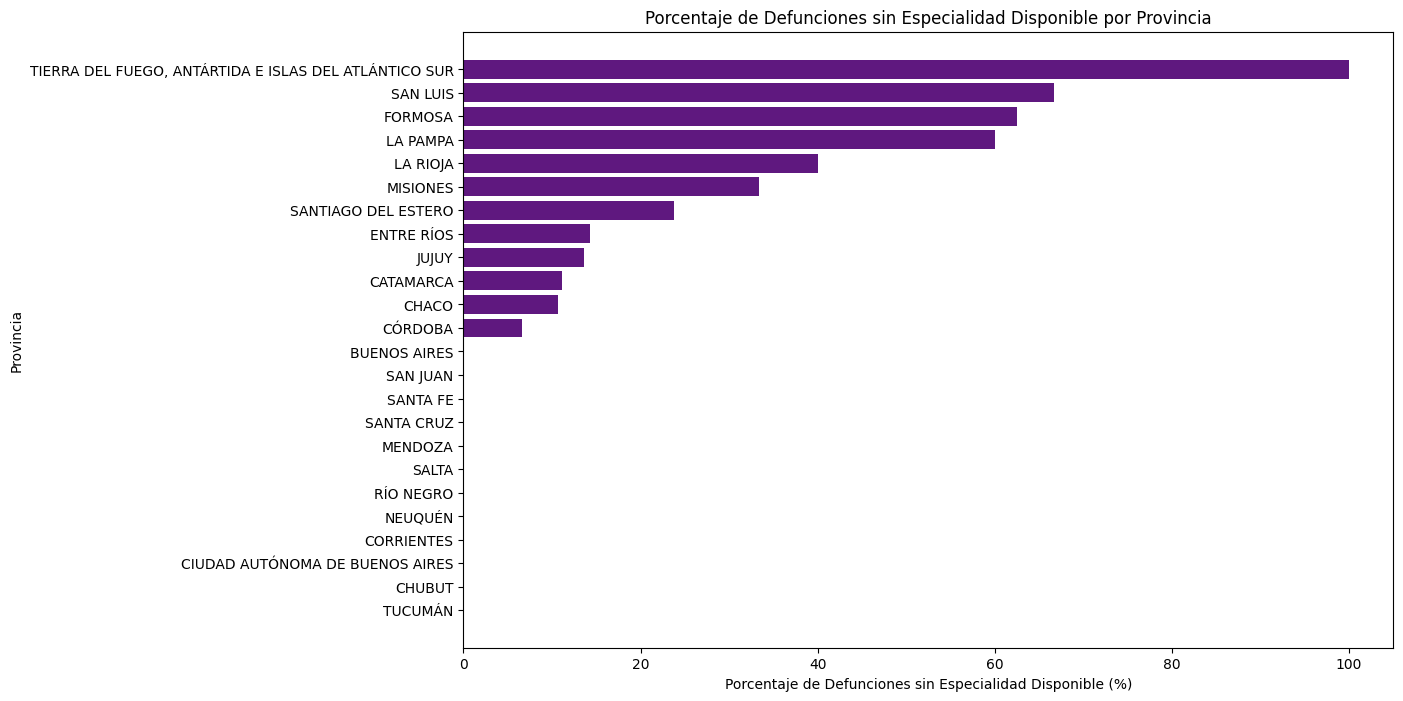

In [ ]:
# Crear el gráfico de barras horizontales
plt.figure(figsize=(12, 8))
plt.barh(provincias_df['provincia_nombre'], provincias_df['porcentaje_sin_especialidad'], color=color_lila)
plt.xlabel('Porcentaje de Defunciones sin Especialidad Disponible (%)')
plt.ylabel('Provincia')
plt.title('Porcentaje de Defunciones sin Especialidad Disponible por Provincia')
plt.gca().invert_yaxis()  # Invertir el eje y para que la provincia con mayor necesidad esté arriba
plt.show()


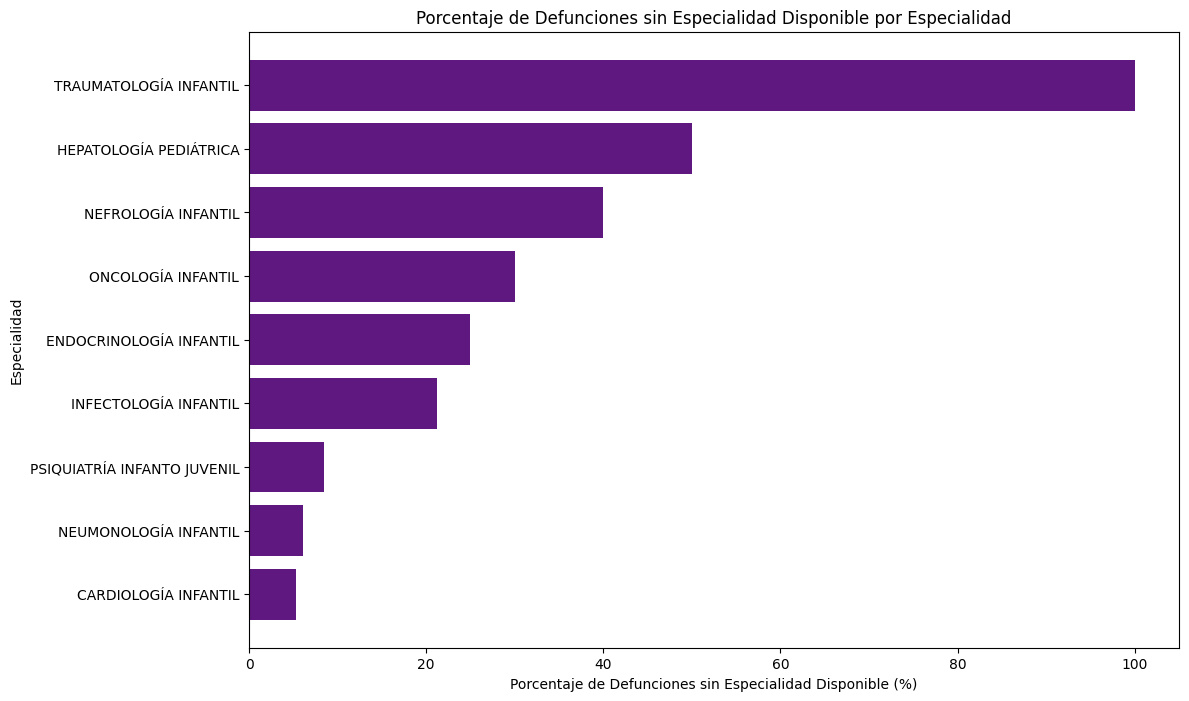

In [ ]:
# Crear el gráfico de barras horizontales
plt.figure(figsize=(12, 8))
plt.barh(especialidades_df['Especialidad'], especialidades_df['porcentaje_sin_especialidad'], color=color_lila)
plt.xlabel('Porcentaje de Defunciones sin Especialidad Disponible (%)')
plt.ylabel('Especialidad')
plt.title('Porcentaje de Defunciones sin Especialidad Disponible por Especialidad')
plt.gca().invert_yaxis()  # Invertir el eje y para que la especialidad con mayor necesidad esté arriba
plt.show()


A partir de los cálculos realizados, se generaron dos tipos de gráficos para visualizar la situación de las especialidades médicas en relación con las defunciones infantiles:

* Gráfico de Porcentaje de Defunciones sin Especialidad por Provincia: Este gráfico muestra el porcentaje de defunciones en cada provincia donde la especialidad requerida no estaba disponible. Se utilizaron los datos de defunciones totales y defunciones sin especialidad por provincia para calcular este porcentaje.

* Gráfico de Porcentaje de Defunciones sin Especialidad por Especialidad: En este gráfico, se presenta el porcentaje de defunciones para cada especialidad médica donde esa especialidad no estaba disponible. Se calcularon las defunciones totales y las defunciones sin especialidad por cada especialidad médica.

Estos gráficos nos ayudan a identificar las provincias y las especialidades médicas con mayores necesidades de especialistas para mejorar la atención médica infantil."








In [ ]:
# Filtrar las filas donde la especialidad no está disponible
df_especialidades_faltantes = df_pediatria_def[df_pediatria_def['especialidad_disponible'] == 0]

# Agrupar por provincia y especialidad, y contar la cantidad de muertes
especialidades_faltantes_por_provincia = df_especialidades_faltantes.groupby(['provincia_nombre', 'Especialidad']).size().reset_index(name='cantidad')


In [ ]:
# Filtrar las especialidades faltantes solo para Tucumán
especialidades_faltantes_tucuman = especialidades_faltantes_por_provincia[especialidades_faltantes_por_provincia['provincia_nombre'] == 'TUCUMÁN']

# Mostrar las especialidades faltantes en Tucumán
print("Especialidades faltantes en Tucumán:")
print(especialidades_faltantes_tucuman)

# Repetir el proceso para cada provincia
# Por ejemplo, para Buenos Aires
especialidades_faltantes_bsas = especialidades_faltantes_por_provincia[especialidades_faltantes_por_provincia['provincia_nombre'] == 'NEUQUÉN']
print("\nEspecialidades faltantes en Neuquén:")
print(especialidades_faltantes_bsas)

# Repetir para las demás provincias


Especialidades faltantes en Tucumán:
Empty DataFrame
Columns: [provincia_nombre, Especialidad, cantidad]
Index: []

Especialidades faltantes en Neuquén:
Empty DataFrame
Columns: [provincia_nombre, Especialidad, cantidad]
Index: []


Repetimos los pasos para *'df_adultos_def'*

In [ ]:
df_adultos_def['especialidad_disponible'].unique()

array([1, 0])

In [ ]:
# Contar la cantidad de ceros y unos en la columna 'especialidad_disponible'
conteo_especialidad_disponible_adultos = df_adultos_def['especialidad_disponible'].value_counts()

# Mostrar el conteo de ceros y unos de manera más clara
print(f"Cantidad de ceros (especialidad no disponible): {conteo_especialidad_disponible_adultos[0]}")
print(f"Cantidad de unos (especialidad disponible): {conteo_especialidad_disponible_adultos[1]}")

Cantidad de ceros (especialidad no disponible): 253
Cantidad de unos (especialidad disponible): 5796


In [ ]:
# Calcular la cantidad total de defunciones en cada provincia
defunciones_por_provincia_adultos = df_adultos_def.groupby('provincia_nombre')['cantidad'].sum().reset_index()

# Calcular la cantidad de defunciones donde la especialidad no está disponible en cada provincia
defunciones_sin_especialidad_adultos = df_adultos_def[df_adultos_def['especialidad_disponible'] == 0].groupby('provincia_nombre')['cantidad'].sum().reset_index()

# Fusionar los datos para tener la información en un solo DataFrame
provincias_df_adultos = defunciones_por_provincia_adultos.merge(defunciones_sin_especialidad_adultos, on='provincia_nombre', suffixes=('_total', '_sin_especialidad'), how='outer')

# Rellenar los valores faltantes con 0
provincias_df_adultos['cantidad_total'].fillna(0, inplace=True)
provincias_df_adultos['cantidad_sin_especialidad'].fillna(0, inplace=True)

# Calcular el porcentaje de defunciones sin especialidad sobre el total de defunciones en cada provincia
provincias_df_adultos['porcentaje_sin_especialidad'] = provincias_df_adultos['cantidad_sin_especialidad'] / provincias_df_adultos['cantidad_total'] * 100

# Rellenar los porcentajes NaN con 0
provincias_df_adultos['porcentaje_sin_especialidad'].fillna(0, inplace=True)

# Ordenar por el porcentaje para identificar las provincias con mayores necesidades
provincias_df_adultos = provincias_df_adultos.sort_values(by='porcentaje_sin_especialidad', ascending=False)

# Calcular la cantidad total de defunciones para cada especialidad
defunciones_por_especialidad_adultos = df_adultos_def.groupby('Especialidad')['cantidad'].sum().reset_index()

# Calcular la cantidad de defunciones donde la especialidad no está disponible para cada especialidad
defunciones_sin_especialidad_especialidad_adultos = df_adultos_def[df_adultos_def['especialidad_disponible'] == 0].groupby('Especialidad')['cantidad'].sum().reset_index()

# Fusionar los datos para tener la información en un solo DataFrame
especialidades_df_adultos = defunciones_por_especialidad_adultos.merge(defunciones_sin_especialidad_especialidad_adultos, on='Especialidad', suffixes=('_total', '_sin_especialidad'))

# Calcular el porcentaje de defunciones sin especialidad sobre el total de defunciones para cada especialidad
especialidades_df_adultos['porcentaje_sin_especialidad'] = especialidades_df_adultos['cantidad_sin_especialidad'] / especialidades_df_adultos['cantidad_total'] * 100

# Ordenar por el porcentaje para identificar las especialidades con mayores necesidades
especialidades_df_adultos = especialidades_df_adultos.sort_values(by='porcentaje_sin_especialidad', ascending=False)




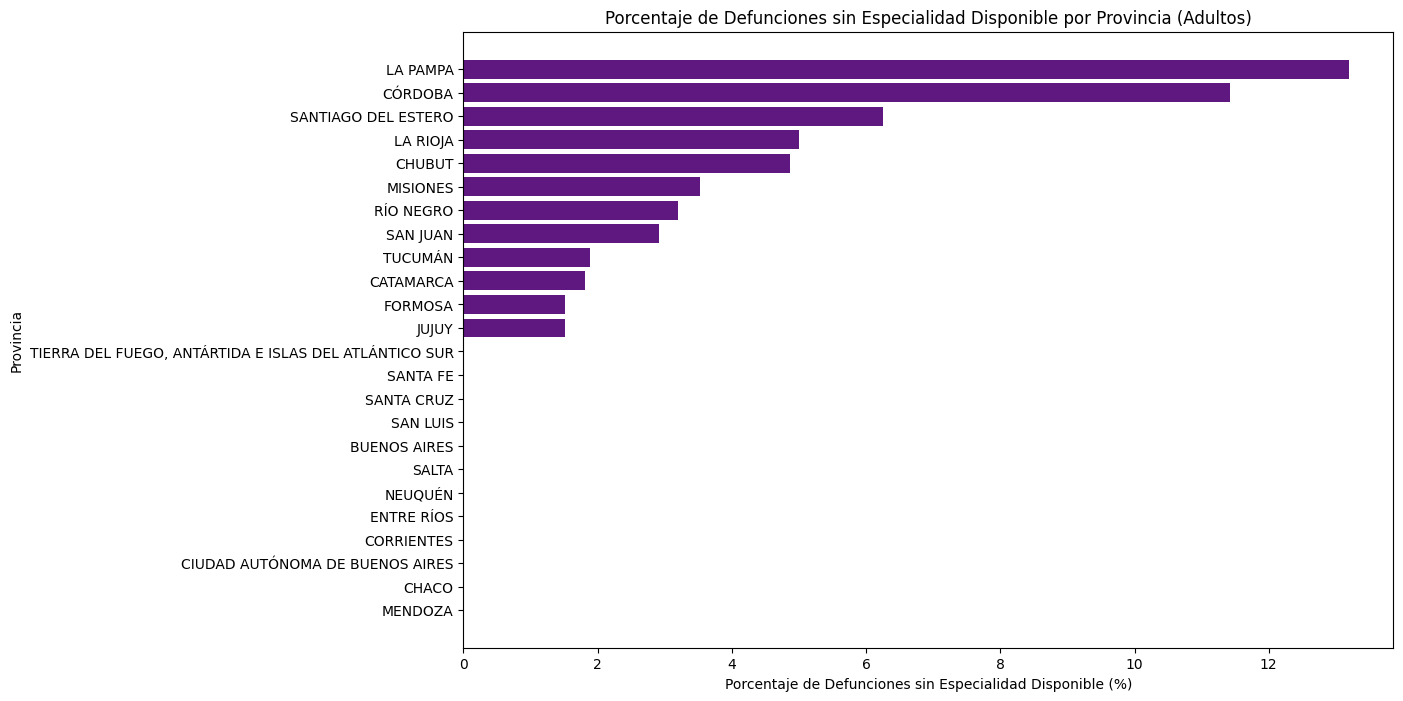

In [ ]:
# Crear el gráfico de barras horizontales
plt.figure(figsize=(12, 8))
plt.barh(provincias_df_adultos['provincia_nombre'], provincias_df_adultos['porcentaje_sin_especialidad'], color=color_lila)
plt.xlabel('Porcentaje de Defunciones sin Especialidad Disponible (%)')
plt.ylabel('Provincia')
plt.title('Porcentaje de Defunciones sin Especialidad Disponible por Provincia (Adultos)')
plt.gca().invert_yaxis()  # Invertir el eje y para que la provincia con mayor necesidad esté arriba
plt.show()


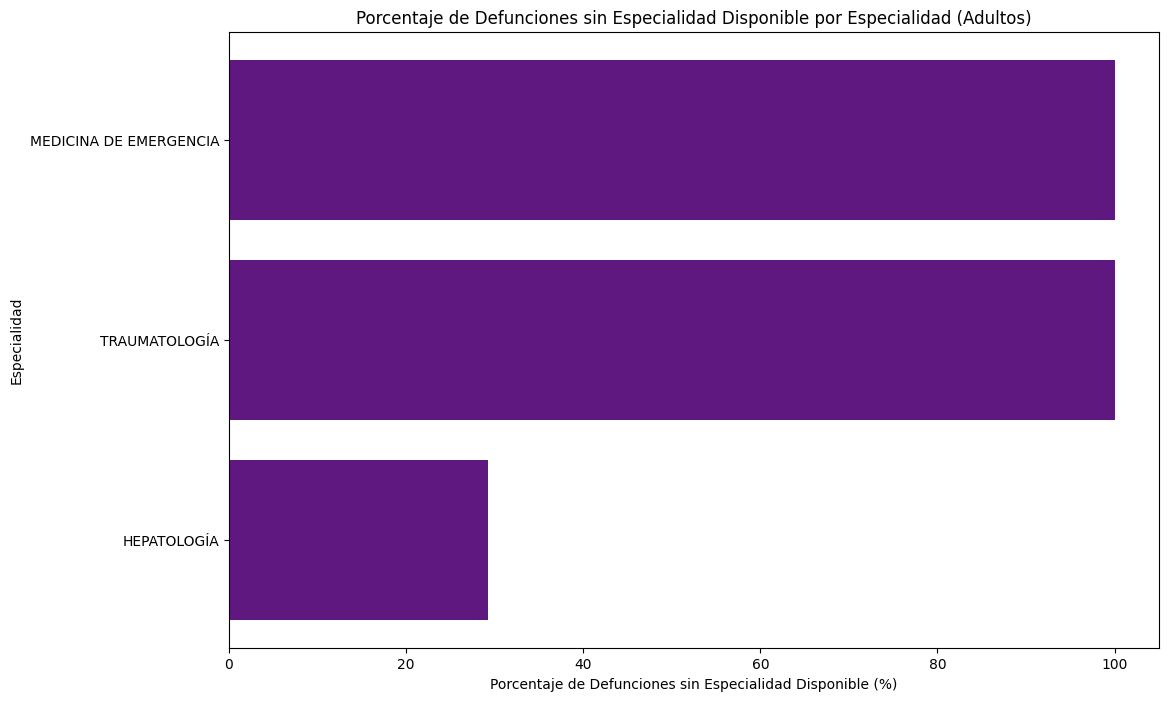

In [ ]:

# Crear el gráfico de barras horizontales
plt.figure(figsize=(12, 8))
plt.barh(especialidades_df_adultos['Especialidad'], especialidades_df_adultos['porcentaje_sin_especialidad'], color=color_lila)
plt.xlabel('Porcentaje de Defunciones sin Especialidad Disponible (%)')
plt.ylabel('Especialidad')
plt.title('Porcentaje de Defunciones sin Especialidad Disponible por Especialidad (Adultos)')
plt.gca().invert_yaxis()  # Invertir el eje y para que la especialidad con mayor necesidad esté arriba
plt.show()

Los gráficos muestran el porcentaje de defunciones en adultos en cada provincia y por especialidad en las que la especialidad requerida no estaba disponible. Estos gráficos pueden ayudar a identificar áreas geográficas y especialidades médicas donde existe una mayor necesidad de profesionales de la salud o de recursos médicos.

* Porcentaje de Defunciones sin Especialidad Disponible por Provincia (Adultos): Este gráfico muestra, para cada provincia, el porcentaje de defunciones en adultos donde la especialidad médica requerida no estaba disponible. Puede ayudar a identificar las provincias con mayores carencias en términos de acceso a especialidades médicas específicas para adultos, lo que podría indicar la necesidad de invertir en recursos médicos y profesionales en esas áreas.

* Porcentaje de Defunciones sin Especialidad Disponible por Especialidad (Adultos): Este gráfico muestra, para cada especialidad médica, el porcentaje de defunciones en adultos donde esa especialidad no estaba disponible. Puede ayudar a identificar las especialidades médicas más necesarias pero menos disponibles en el contexto de defunciones en adultos, lo que podría guiar la planificación de recursos médicos y la formación de profesionales de la salud en áreas críticas.

Podemos ver que los resultados son bastante diferentes a los obtenidos en los casos pediatricos.

## Relevamiento de la Tasa de Mortalidad y Defunciones sin Especialidad por Provincia en Argentina

Usando los datos del df_población y df2 que es antes de filtrar las cusas de muertes, vamos a hacer un parámetro 'tasa de mortalidad' que relacione la cantidad de muertes por provincia y la población total en esa provincia.
Al igual que antes vamos a diferenciar entre adultos y niños, también podríamos diferenciar por sexo.

In [ ]:
df2['grupo_edad'].unique()

array(['01.De a 0  a 14 anios', '02.De 15 a 34 anios',
       '03.De 35 a 54 anios', '04.De 55 a 74 anios',
       '05.De 75 anios y mas', '06.Sin especificar'], dtype=object)

In [ ]:
# Definir los grupos de edad para adultos y pediatría
grupos_edad_adultos = ['02.De 15 a 34 anios', '03.De 35 a 54 anios', '04.De 55 a 74 anios', '05.De 75 anios y mas']
grupos_edad_ped = ['01.De a 0  a 14 anios']

# Filtrar el DataFrame original por grupos de edad para adultos y pediatría
df2_adulto = df2[df2['grupo_edad'].isin(grupos_edad_adultos)]
df2_ped = df2[df2['grupo_edad'].isin(grupos_edad_ped)]

# Mostrar información básica de los nuevos DataFrames
print("Información de df2_adulto:")
print(df2_adulto.info())

print("\nInformación de df2_ped:")
print(df2_ped.info())

Información de df2_adulto:
<class 'pandas.core.frame.DataFrame'>
Index: 35852 entries, 80124 to 816978
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   jurisdiccion_de_residencia_id  35852 non-null  int64 
 1   provincia_nombre               35852 non-null  object
 2   cie10_causa_id                 35852 non-null  object
 3   causa_defuncion                35852 non-null  object
 4   sexo_id                        35852 non-null  int64 
 5   Sexo                           35852 non-null  object
 6   muerte_materna_id              35852 non-null  object
 7   muerte_materna_clasificacion   35852 non-null  object
 8   grupo_edad                     35852 non-null  object
 9   cantidad                       35852 non-null  int64 
 10  codigo                         35852 non-null  object
 11  rango_edad                     35852 non-null  object
dtypes: int64(3), object(9)
memory usa

In [ ]:
# Para df2_adulto
muertes_por_provincia_adulto = df2_adulto.groupby('provincia_nombre')['cantidad'].sum().reset_index()

# Para df2_ped
muertes_por_provincia_ped = df2_ped.groupby('provincia_nombre')['cantidad'].sum().reset_index()

# Mostrar los resultados
print("Muertes por provincia en df2_adulto:")
print(muertes_por_provincia_adulto)

print("\nMuertes por provincia en df2_ped:")
print(muertes_por_provincia_ped)


Muertes por provincia en df2_adulto:
                                     provincia_nombre  cantidad
0                                        Buenos Aires    131377
1                                           Catamarca      2328
2                                               Chaco      7472
3                                              Chubut      3144
4                     Ciudad Autónoma de Buenos Aires     29852
5                                          Corrientes      6892
6                                             Córdoba     28907
7                                          Entre Ríos      9919
8                                             Formosa      3357
9                                               Jujuy      4155
10                                           La Pampa      2319
11                                           La Rioja      2129
12                                            Mendoza     13287
13                                           Misiones      6682
14 

In [ ]:
# Convertir nombres de provincia a mayúsculas en df2_adulto
muertes_por_provincia_adulto['provincia_nombre'] = muertes_por_provincia_adulto['provincia_nombre'].str.upper()

# Convertir nombres de provincia a mayúsculas en df2_ped
muertes_por_provincia_ped['provincia_nombre'] = muertes_por_provincia_ped['provincia_nombre'].str.upper()

In [ ]:
# Calcular la tasa de mortalidad por provincia en adultos
muertes_por_provincia_adulto['Tasa de Mortalidad Adultos'] = muertes_por_provincia_adulto['cantidad'] / df_poblacion['Población 2019'] * 1000000

# Calcular la tasa de mortalidad por provincia en pediatría
muertes_por_provincia_ped['Tasa de Mortalidad Pediatría'] = muertes_por_provincia_ped['cantidad'] / df_poblacion['Población 2019'] * 1000000


In [ ]:
# DataFrame de tasa de mortalidad por provincia en adultos
df_tasa_mortalidad_adulto = muertes_por_provincia_adulto[['provincia_nombre', 'Tasa de Mortalidad Adultos']]

# DataFrame de tasa de mortalidad por provincia en pediatría
df_tasa_mortalidad_ped = muertes_por_provincia_ped[['provincia_nombre', 'Tasa de Mortalidad Pediatría']]


In [ ]:
df_tasa_mortalidad_adulto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   provincia_nombre            24 non-null     object 
 1   Tasa de Mortalidad Adultos  24 non-null     float64
dtypes: float64(1), object(1)
memory usage: 512.0+ bytes


**Mapas finales**

Vamos a descargar el archivo provincia.json que nos permite graficar mapas de:

https://github.com/JuliMarquez/Sin-bajar-la-Guard.IA/blob/main/provincia.zip

Luego vamos a graficar mapas de la argentina relacionando los colores con:
1. Tasa de mortalidad de adultos
2. Tasa de mortalidad en niños

In [ ]:
# URL del archivo zip
url = "https://github.com/JuliMarquez/Sin-bajar-la-Guard.IA/blob/main/provincia.zip?raw=true"

# Descargar el archivo zip
response = requests.get(url)
zip_file = zipfile.ZipFile(io.BytesIO(response.content))

# Extraer el archivo provincia.json del zip
zip_file.extractall()

# Leer el archivo provincia.json
map_data = gpd.read_file("provincia.json")

# Convertir los nombres de provincia en map_data a mayúsculas
map_data['nam'] = map_data['nam'].str.upper()




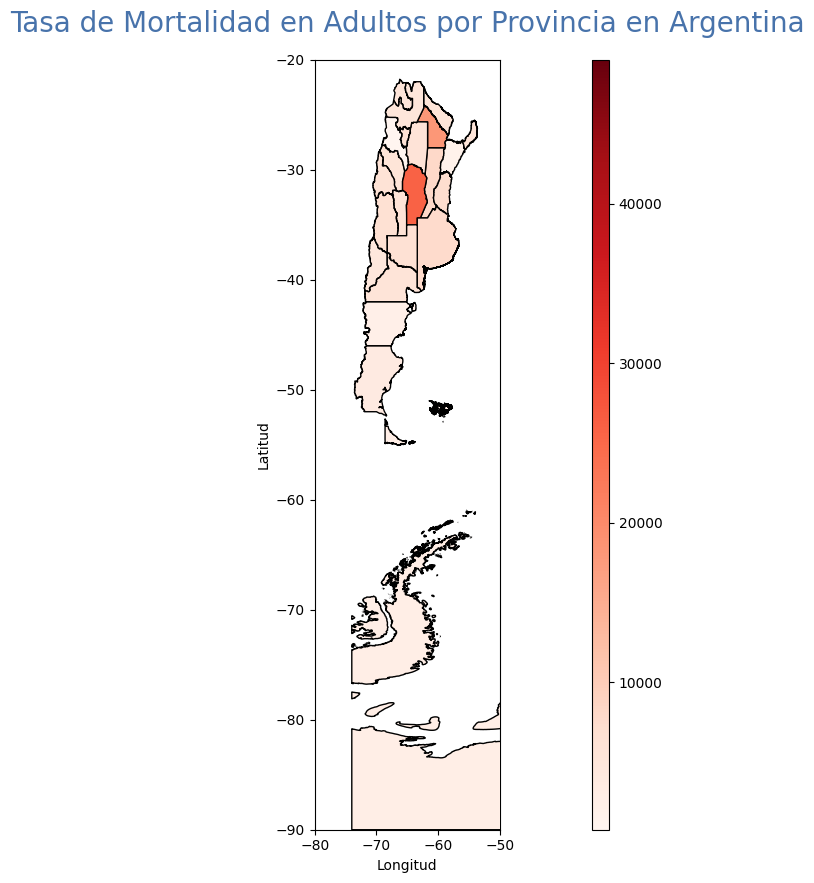

In [ ]:
# Merge de los datos geográficos con las tasas de mortalidad
map_data_adultos = map_data.merge(df_tasa_mortalidad_adulto, left_on='nam', right_on='provincia_nombre')

# Control del tamaño de la figura del mapa
fig, ax = plt.subplots(figsize=(8, 10))

# Control del encuadre (área geográfica) del mapa
ax.axis([-80, -50, -90, -20])

# Control del título y los ejes
ax.set_title('Tasa de Mortalidad en Adultos por Provincia en Argentina',
             pad=20,
             fontdict={'fontsize': 20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

# Añadir la leyenda separada del mapa
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)

# Generar y cargar el mapa
map_data_adultos.plot(column='Tasa de Mortalidad Adultos', cmap='Reds', ax=ax,
              legend=True, cax=cax, zorder=5, edgecolor="black")

# Mostrar el mapa finalizado
plt.show()

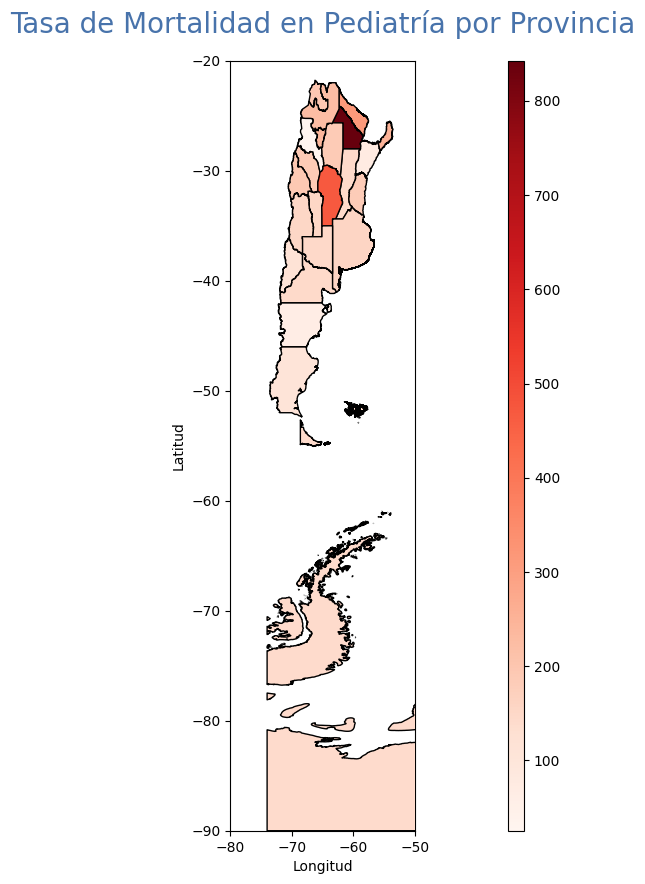

In [ ]:
# Merge de los datos geográficos con las tasas de mortalidad
map_data_ped = map_data.merge(df_tasa_mortalidad_ped, left_on='nam', right_on='provincia_nombre')

# Control del tamaño de la figura del mapa
fig, ax = plt.subplots(figsize=(8, 10))

# Control del encuadre (área geográfica) del mapa
ax.axis([-80, -50, -90, -20])

# Control del título y los ejes
ax.set_title('Tasa de Mortalidad en Pediatría por Provincia',
             pad=20,
             fontdict={'fontsize': 20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

# Añadir la leyenda separada del mapa
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)

# Generar y cargar el mapa
map_data_ped.plot(column='Tasa de Mortalidad Pediatría', cmap='Reds', ax=ax,
              legend=True, cax=cax, zorder=5, edgecolor="black")

# Mostrar el mapa finalizado
plt.show()

Ahora vamos a graficar dos mapas para ver visualmente en que provincias hay más muertes sin la especialidad requerida:
3. En adultos
4. En niños



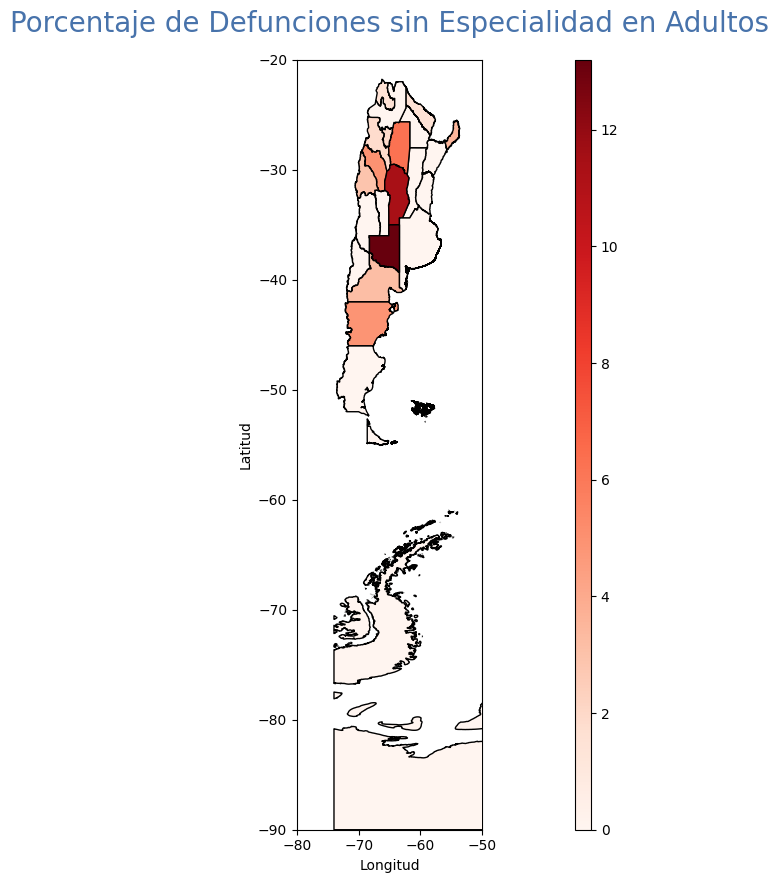

In [ ]:
# Merge de los datos geográficos con las tasas de mortalidad
map_data_adultos_def = map_data.merge(provincias_df_adultos, left_on='nam', right_on='provincia_nombre')

# Control del tamaño de la figura del mapa
fig, ax = plt.subplots(figsize=(8, 10))

# Control del encuadre (área geográfica) del mapa
ax.axis([-80, -50, -90, -20])

# Control del título y los ejes
ax.set_title('Porcentaje de Defunciones sin Especialidad en Adultos',
             pad=20,
             fontdict={'fontsize': 20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

# Añadir la leyenda separada del mapa
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)

# Generar y cargar el mapa
map_data_adultos_def.plot(column='porcentaje_sin_especialidad', cmap='Reds', ax=ax,
              legend=True, cax=cax, zorder=5, edgecolor="black")

# Mostrar el mapa finalizado
plt.show()

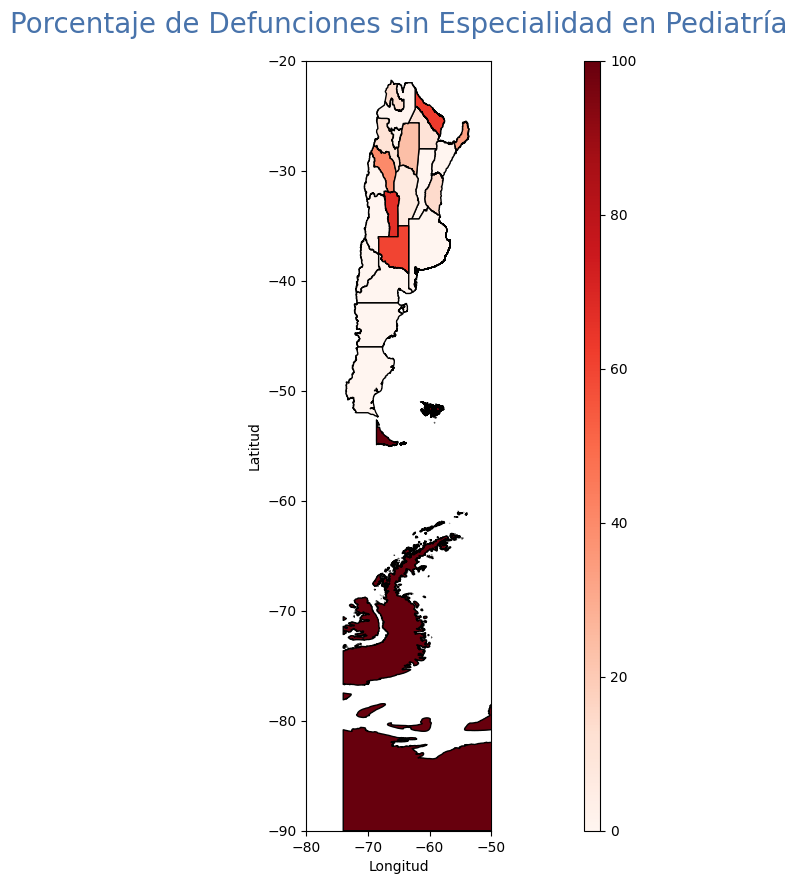

In [ ]:
# Merge de los datos geográficos con las tasas de mortalidad
map_data_pediatria_def = map_data.merge(provincias_df, left_on='nam', right_on='provincia_nombre')

# Control del tamaño de la figura del mapa
fig, ax = plt.subplots(figsize=(8, 10))

# Control del encuadre (área geográfica) del mapa
ax.axis([-80, -50, -90, -20])

# Control del título y los ejes
ax.set_title('Porcentaje de Defunciones sin Especialidad en Pediatría',
             pad=20,
             fontdict={'fontsize': 20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

# Añadir la leyenda separada del mapa
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)

# Generar y cargar el mapa
map_data_pediatria_def.plot(column='porcentaje_sin_especialidad', cmap='Reds', ax=ax,
              legend=True, cax=cax, zorder=5, edgecolor="black")

# Mostrar el mapa finalizado
plt.show()

![data](https://media1.tenor.com/m/0fkdMXI_36QAAAAC/cat-what.gif)

Los mapas generados muestran visualmente las tasas de mortalidad y los porcentajes de defunciones sin especialidad en distintas provincias de Argentina. Estas visualizaciones permiten identificar claramente las áreas con mayores necesidades en términos de atención médica, tanto en el ámbito adulto como pediátrico.

Para los mapas de tasas de mortalidad, se observa que ciertas provincias tienen tasas significativamente más altas, lo cual puede indicar problemas estructurales en el sistema de salud de esas regiones o condiciones socioeconómicas adversas que requieren atención.

En los mapas que muestran el porcentaje de defunciones sin especialidad, se destaca la importancia de especialidades médicas disponibles en cada provincia. Las áreas con porcentajes más altos de defunciones sin especialidad pueden necesitar una redistribución de recursos médicos o una formación especializada para cubrir esas necesidades.


1. Mapa de Tasa de Mortalidad en Adultos por Provincia en Argentina

  Este mapa muestra la distribución de la tasa de mortalidad en adultos a lo largo de las provincias argentinas. Las provincias con tasas más altas se destacan en rojo, indicando áreas con mayores desafíos en la atención médica para adultos.

2. Mapa de Tasa de Mortalidad en Pediatría por Provincia en Argentina

  Este mapa ilustra la tasa de mortalidad en la población pediátrica en distintas provincias. Las áreas en rojo representan provincias con mayores tasas de mortalidad pediátrica, subrayando la necesidad de una atención más focalizada en estas regiones.

3. Mapa del Porcentaje de Defunciones sin Especialidad en Adultos por Provincia en Argentina

  En este mapa, se visualiza el porcentaje de defunciones en adultos donde no se contaba con la especialidad médica requerida. Las provincias en rojo son aquellas con mayores porcentajes, sugiriendo la necesidad de incrementar la disponibilidad de especialidades médicas en estas zonas.

4. Mapa del Porcentaje de Defunciones sin Especialidad en Pediatría por Provincia en Argentina

  Este mapa presenta el porcentaje de defunciones en la población pediátrica que ocurrieron sin la disponibilidad de la especialidad médica necesaria. Las provincias destacadas en rojo indican áreas con mayores deficiencias en especialidades pediátricas, requiriendo atención prioritaria.

# **.. Terminando**




![data](https://media2.giphy.com/media/v1.Y2lkPTc5MGI3NjExaGp1Yzlyc3J4eng0amg2cTh3ZzNqdWszem5sZXhnbDQ2dzcyMWF3eCZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/cmegx6SssTKmEFEcwj/giphy.webp)

![data](https://media2.giphy.com/media/v1.Y2lkPTc5MGI3NjExZ3lzYjh3N3JuamVlZDJnNGh0aHpxNjM2MjBvMWN4dGdnOHVoM2tmcyZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/9xk1xeuHKz48cm7cnu/giphy.webp)

Concluimos:
* Tasa de Mortalidad en Adultos y Pediatría:
  Los mapas de tasa de mortalidad en adultos y pediatría revelan disparidades significativas entre provincias en Argentina. Las regiones con tasas más altas pueden señalar áreas donde se requiere una mejora urgente en los servicios de salud, infraestructura médica y acceso a atención especializada.

* Deficiencias en Especialidades Médicas:
  Los mapas que muestran el porcentaje de defunciones sin especialidad subrayan la importancia de contar con profesionales médicos capacitados en todas las áreas necesarias. Las provincias con porcentajes más altos de defunciones sin especialidad indican necesidades críticas de capacitación médica y asignación de recursos.

* Prioridades para Políticas de Salud:
  Estos análisis geoespaciales pueden orientar políticas de salud pública enfocadas en mejorar la equidad y accesibilidad de servicios médicos en todo el país. Identificar las regiones con mayores necesidades permite implementar intervenciones específicas para reducir las tasas de mortalidad y mejorar la calidad de vida de la población.

* Importancia de la Distribución Equitativa de Recursos:
  La distribución equitativa de recursos médicos y la capacitación especializada son fundamentales para abordar las disparidades observadas. Asegurar que todas las provincias tengan acceso adecuado a especialidades médicas puede contribuir significativamente a mejorar los resultados de salud y reducir las defunciones evitables.

Estas conclusiones destacan la utilidad de los mapas temáticos en la identificación de áreas críticas de intervención y en la planificación estratégica para mejorar la salud pública en Argentina.